# **Customer Churn Prediction: A Comparative Analysis of Models with and without Sentiment Analysis (PHASE 1).**

> **Overview of the Study:**


1.   The core purpose of this study is to find the impact of Sentiment Analysis in predicting customer churn for the e-commerce industry by employing different predictive models.

2. Furthermore,  the study is also focused on observing which model is best in a more accurate prediction for determining the churn rate of customers.

> **Process involved in the Study:**

1. The whole project is divided into two phases. In the first phase, all the relevant variables that are expected to be causing the customer churn are selected and then the predictive models are developed. In this, there will be no feedback from the customer is utilized.

2. In the second phase, in addition to all the relevant variables obtained from EDA, the feedback provided by the customers is also included in this phase to extract the sentiment scores which are now added to the data frame. Again, the churn predictive models are developed with this data.

3. Finally, the metrics from both these phases will be reviewed and interpreted to understand if the inclusion of the sentiment analysis will be helpful for the organization in better understanding why their customers are parting away without making any future transactions with the organization.






## **Research Question:** "How does sentiment analysis impact in predicting the customer churn of an organization?"

# **Introduction:**



1.   In the previous deliverables, both the study phases are implemented. Nonetheless, before proceeding to the comparison of model metrics from each phase and among both phases (will be done in next step of study), a few other additional steps have been implemented in this file of study.
2.   In addition to the four models implemented, a new model called **Naive Bayes** is also implemented in this study to observed if there is any improvement or decrement in the performance of prediction.

3. Furthermore, the following additional enhancements are also performed:
    *   Cross-Validation is changed to **10 folds** instead of the previous **5-fold** cross-validation.
   
    *   **Time required** to train the models and also **memory consumed** by the models are also addressed.
    *   Additional hyperparameters related to kernel are added to the **SVM** tuning process.
    *   **Sensitivity, Specificity, ROC_AUC** scores are also calculated for models.
    *   Plotted the **AUC-ROC Curve** for all the models.
    *   Finally, **pickle files** have been created for all the models.
  
4. In the next step (later in process), the interpretation and comparison of results will be done.



# **This file works on the "first phase" of the prediction study where the Churn Prediction is done with the inclusion of the "customer feedback". The below steps will dive into the whole scenario.**

# **Attaching the Colab Notebook to local system to import the dataset.**

In [ ]:
from google.colab import files
from google.colab import drive

# drive.mount('/content/drive')
uploaded = files.upload()

Saving churn.csv to churn.csv


# **Importing the Customer Churn Data**

In [ ]:
import pandas as pd
df = pd.read_csv("churn.csv")

In [ ]:
## Checking the rows and columns count

print("The numer of rows are: ",df.shape[0], "\nThe number of columns are: ",df.shape[1])

print("\n",df.columns) ## All the variables/columns in the data

The numer of rows are:  36992 
The number of columns are:  24

 Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'label', 'score'],
      dtype='object')

# **Now, the sentiment scores and sentiments of the customers are extracted from their feedback and are added to the data.**

# **1. This new data will now be used to train the models.**



# **2. The rest of the process from here remains same which was implemented in Phase 1.**
# **3. First, the EDA and the other preprocessing steps will be performed from this stage.**



# **Exploratory Data Analysis Starts**

## **Checking for Class Imbalance**

The counts of observations in each class are: 
1    20012
0    16980
Name: churn_risk_score, dtype: int64

The percentage of classes are:
1    54.098183
0    45.901817
Name: churn_risk_score, dtype: float64

The Bar plot distribution for Percentages of each class are: 


<Axes: >

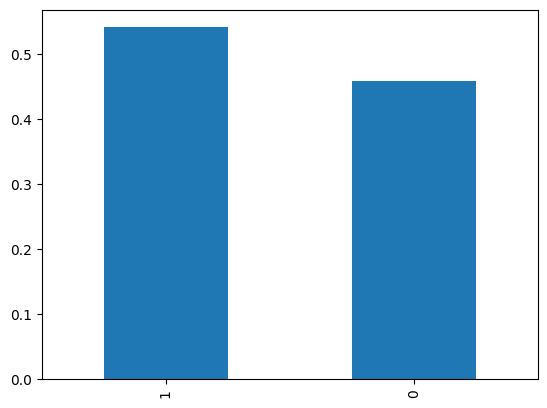

In [ ]:
# Exploratory Data Analysis starts from here

## Beginning of Data Cleaning Process

import numpy as np

print("The counts of observations in each class are: ")
print(df['churn_risk_score'].value_counts())

print("\nThe percentage of classes are:")
# percentage of labels within the each class
print((df['churn_risk_score'].value_counts()/float(len(df))) * 100)


# Percentage Distribution among each class

print("\nThe Bar plot distribution for Percentages of each class are: ")
(df['churn_risk_score'].value_counts()/float(len(df))).plot.bar()

**From the above output it can be seen that there is no too much imbalance in Classes. This can be observed from the fact that Class 1 has 20012 observations which is 54.09% of all the observations and Class 0 has 16980 observations which is about 45.90% of all the observations. As it can be seen that, there is not much difference in classes' counts, there is no class imbalance and hence we can proceed for the next analytical steps. Precisely, there is no need to apply for ADASYN or SMOTE**

# **Checking for Null Values across the variables**

In [ ]:
## Checking if there are any Null Values in the data
print("The Null values for each column are: \n",df.isna().sum())

The Null values for each column are: 
 Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


### **From the above output, it can be seen that there are few null values associated with some variables. These null values will be removed in the DATA CLEANING and PREPROCESSING step.**

# **Checking for Duplicates in the data**

In [ ]:
df.duplicated().sum()

0

**From the above output, it can be seen that there are no duplicates present in the data.**

In [ ]:
## Checking the Datatypes for each variable.

print("The data types for each variable are:\n",df.dtypes)




The data types for each variable are:
 Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
d

**The data types of the variables appear to be inappropriate. Nonetheless, some of the variables which are in the "object" type will be convereted into "category" format. This is due to values in the respective variables like "gender" having factorial values like "Male" and "Female".**

# **Data Cleaning and Preprocessing: Beginning of the Data Cleaning Process**

# **Assigning numeric labels to Categories**

**Few of the important variables that are requried for the anlaysis further are mapped with numerical values based on their categories. This is done for further feasibility of analysis and building of the models.**

In [ ]:
## Converting the 'gender' variable into numeric

df = df[df['gender'].isin(['F','M'])]
df['gender'] = df['gender'].map({'F':0,'M':1})
print("The Unique values in the GENDER Variable are: \n")
print(df['gender'].unique())


## Converting the 'region_category' variable into numeric
df['region_category'] = df['region_category'].map({'Village':0, 'Town':1, 'City':2})
print("\nThe Unique values in the REGION_CATEGORY Variable are: \n",df['region_category'].unique())

## Converting the 'membership_category' variable into numeric
df['membership_category'] = df['membership_category'].map({'No Membership':0, 'Basic Membership':1, 'Silver Membership':2,
                                                                  'Gold Membership':3, 'Platinum Membership':4, 'Premium Membership':5})
print("\nThe Unique values in the membership_category Variable are: \n",df['membership_category'].unique())

## Converting the 'medium_of_operation' variable into numeric
df['medium_of_operation'] = df['medium_of_operation'].map({'Smartphone':0, 'Desktop':1, 'Both':2})
print("\nThe Unique values in the medium_of_operation Variable are: \n",df['medium_of_operation'].unique())
df['medium_of_operation'].unique()


## Converting the 'internet_option' variable into numeric
df['internet_option'] = df['internet_option'].map({'Mobile_Data':0, 'Wi-Fi':1, 'Fiber_Optic':2})
df['internet_option'].unique()
print("\nThe Unique values in the internet_option Variable are: \n",df['internet_option'].unique())

## Converting the 'past_complaint' variable into numeric
df['past_complaint'] = df['past_complaint'].map({'No':0, 'Yes':1})
df['past_complaint'].unique()
print("\nThe Unique values in the past_complaint Variable are: \n",df['past_complaint'].unique())

## Converting the 'complaint_status' variable into numeric
df['complaint_status'] = df['complaint_status'].map({'Not Applicable':0, 'No Information Available':1,
                                                            'Unsolved':3,'Solved in Follow-up':4,
                                                            'Solved':5})
df['complaint_status'].unique()

print("\nThe Unique values in the complaint_status Variable are: \n",df['complaint_status'].unique())




# ## Converting the 'label' variable into numeric
# df['label'] = df['label'].map({'POSITIVE':1, 'NEGATIVE':0})
# df['label'].unique()


print(df.dtypes)

The Unique values in the GENDER Variable are: 

[0 1]

The Unique values in the REGION_CATEGORY Variable are: 
 [ 0.  2.  1. nan]

The Unique values in the membership_category Variable are: 
 [4 5 0 3 2 1]

The Unique values in the medium_of_operation Variable are: 
 [nan  1.  0.  2.]

The Unique values in the internet_option Variable are: 
 [1 0 2]

The Unique values in the past_complaint Variable are: 
 [0 1]

The Unique values in the complaint_status Variable are: 
 [0 5 4 3 1]
Unnamed: 0                        int64
age                               int64
gender                            int64
security_no                      object
region_category                 float64
membership_category               int64
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation             float64
internet_option                   int64
last_visit_time                  o

<ipython-input-3-98e1a61d57bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'F':0,'M':1})
<ipython-input-3-98e1a61d57bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_category'] = df['region_category'].map({'Village':0, 'Town':1, 'City':2})
<ipython-input-3-98e1a61d57bf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

**The NaN values from the above output are nothing but there are few Null or Missing Values in the data which are cleaned in the Data Cleaning Process below.**

# **Removing the Null Values**

In [ ]:
## Removing the Null Values
df = df.dropna()

print(df.isna().sum())

Unnamed: 0                      0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64


# **Correlation Analysis**

The numerical variables are: ['Unnamed: 0', 'age', 'gender', 'region_category', 'membership_category', 'medium_of_operation', 'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'past_complaint', 'complaint_status', 'churn_risk_score']


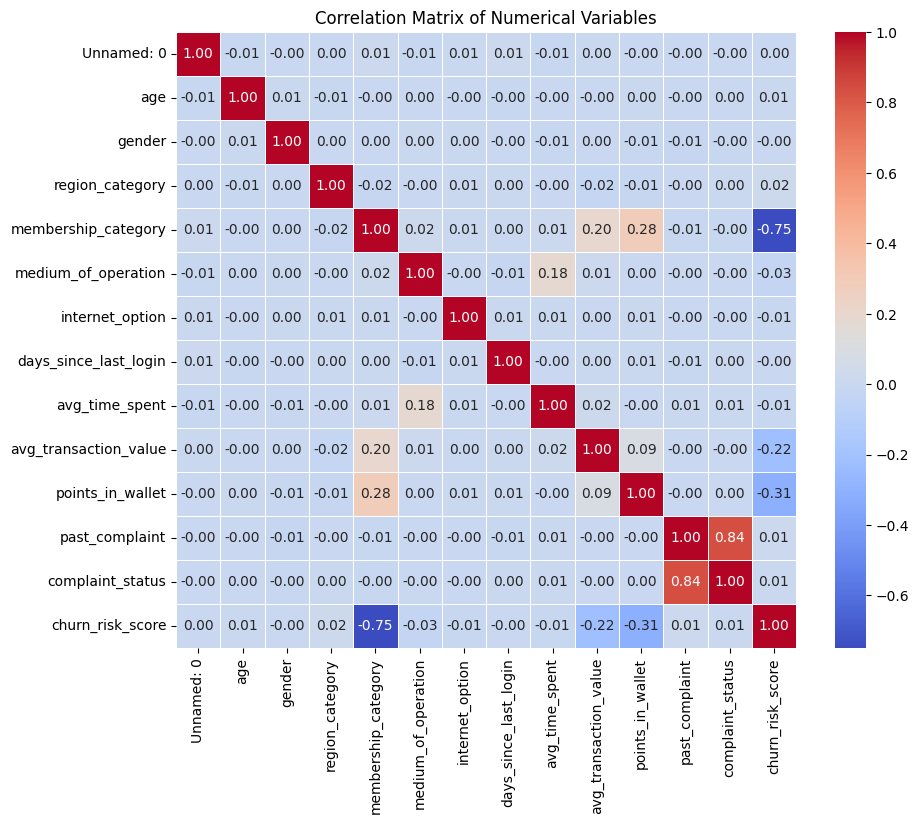

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# # Selecting numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"The numerical variables are: {numerical_vars}")

# # Selecting categorical variables
# categorical_vars = df_cat.select_dtypes(include=['object']).columns.tolist()

# Correlation Analysis for Numerical Variables
numerical_data = df[numerical_vars]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**From the above correlational matrix, it can be observed that there is no multicollinearity.**

# **Variable Selection: Selecting the required variables from the Dataset**

**From all the above analysis performed, the variables which are expected to be contributing to customer churn are selected. Furthermore, in addition to the variables which are identified to be more important, some other variables from the literature review which are found out to be more impactful for the customer churn are also selected.**

In [ ]:
# df.shape

df.columns

Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


* **In this current phase of the study, the sentiment label and sentiment score are also considered this time as part of the model building and analysis which was not done in phase 1.**


*   **The other variables remain the same.**




In [ ]:

## Selecting required columns from the dataframe
df = df.iloc[:,[1,2,4,5,10, 11, 13, 14, 15, 17, 21, 22, 23]]
df.columns


Index(['age', 'gender', 'region_category', 'membership_category',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'points_in_wallet',
       'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

# **Data type conversion for required variables**

In [ ]:

columns = ['gender','region_category','medium_of_operation','membership_category','internet_option','complaint_status','churn_risk_score']

for i in columns:
  df[i] = df[i].astype('category')

# print(df.dtypes)
df.dtypes

age                         int64
gender                   category
region_category          category
membership_category      category
medium_of_operation      category
internet_option          category
days_since_last_login       int64
avg_time_spent            float64
avg_transaction_value     float64
points_in_wallet          float64
complaint_status         category
feedback                   object
churn_risk_score         category
dtype: object

# **Summary of the Data**

In [ ]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,24244.000000,24244.000000,24244.000000,24244.000000,24244.000000
mean,36.975087,-43.230820,242.990085,29274.984008,688.217444
std,15.905782,231.430631,403.316697,19482.111262,193.942554
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236
25%,23.000000,8.000000,59.705000,14239.570000,616.827500
50%,37.000000,12.000000,161.780000,27472.805000,698.600000
75%,51.000000,16.000000,355.222500,40829.692500,764.612500
max,64.000000,26.000000,3040.410000,99914.050000,2069.069761


In [ ]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'points_in_wallet',
       'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

**Box Plots for the Numerical Variables to Check for Outliers**

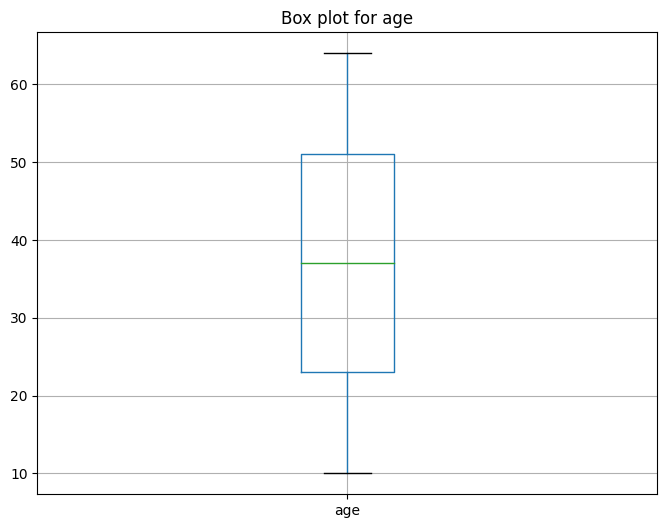

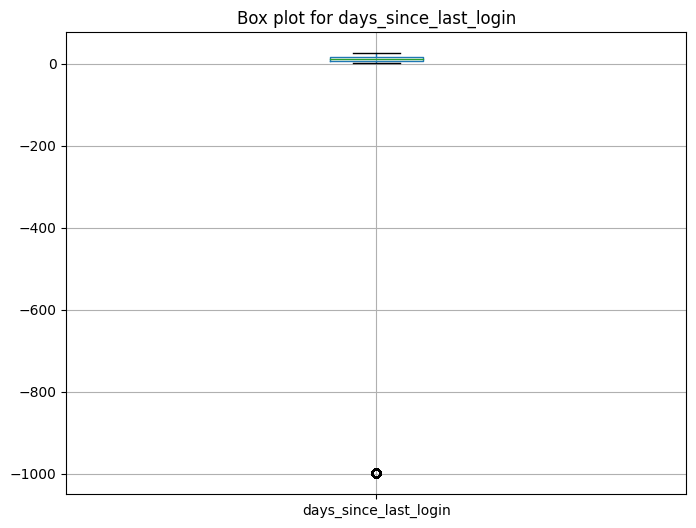

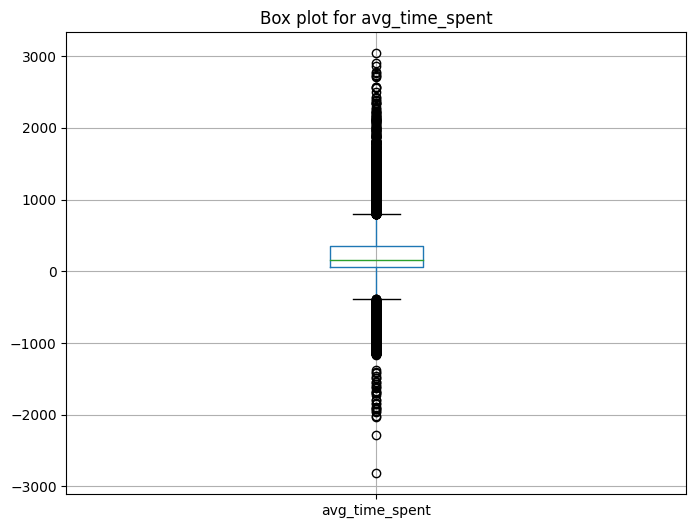

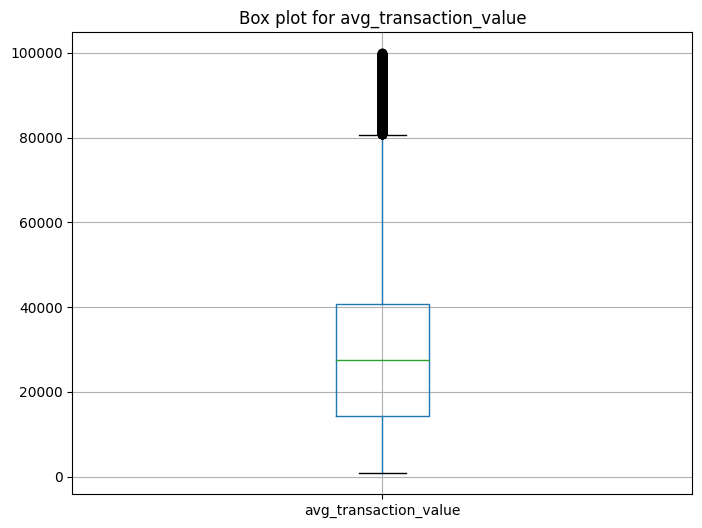

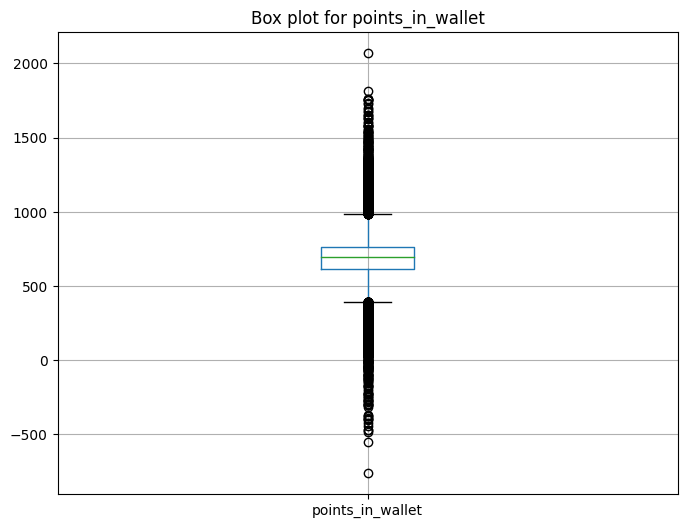

In [ ]:
import matplotlib.pyplot as plt

numerical_columns = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title(f'Box plot for {column}')
    plt.show()


**Even though there are few outliers in some variables, I am not performing any action to remove the outliers. This is because, removing outliers may effect in having loss of valuable information from the data. Those outliers may represent some important insights in the data.**

# **Bivariate Plots**

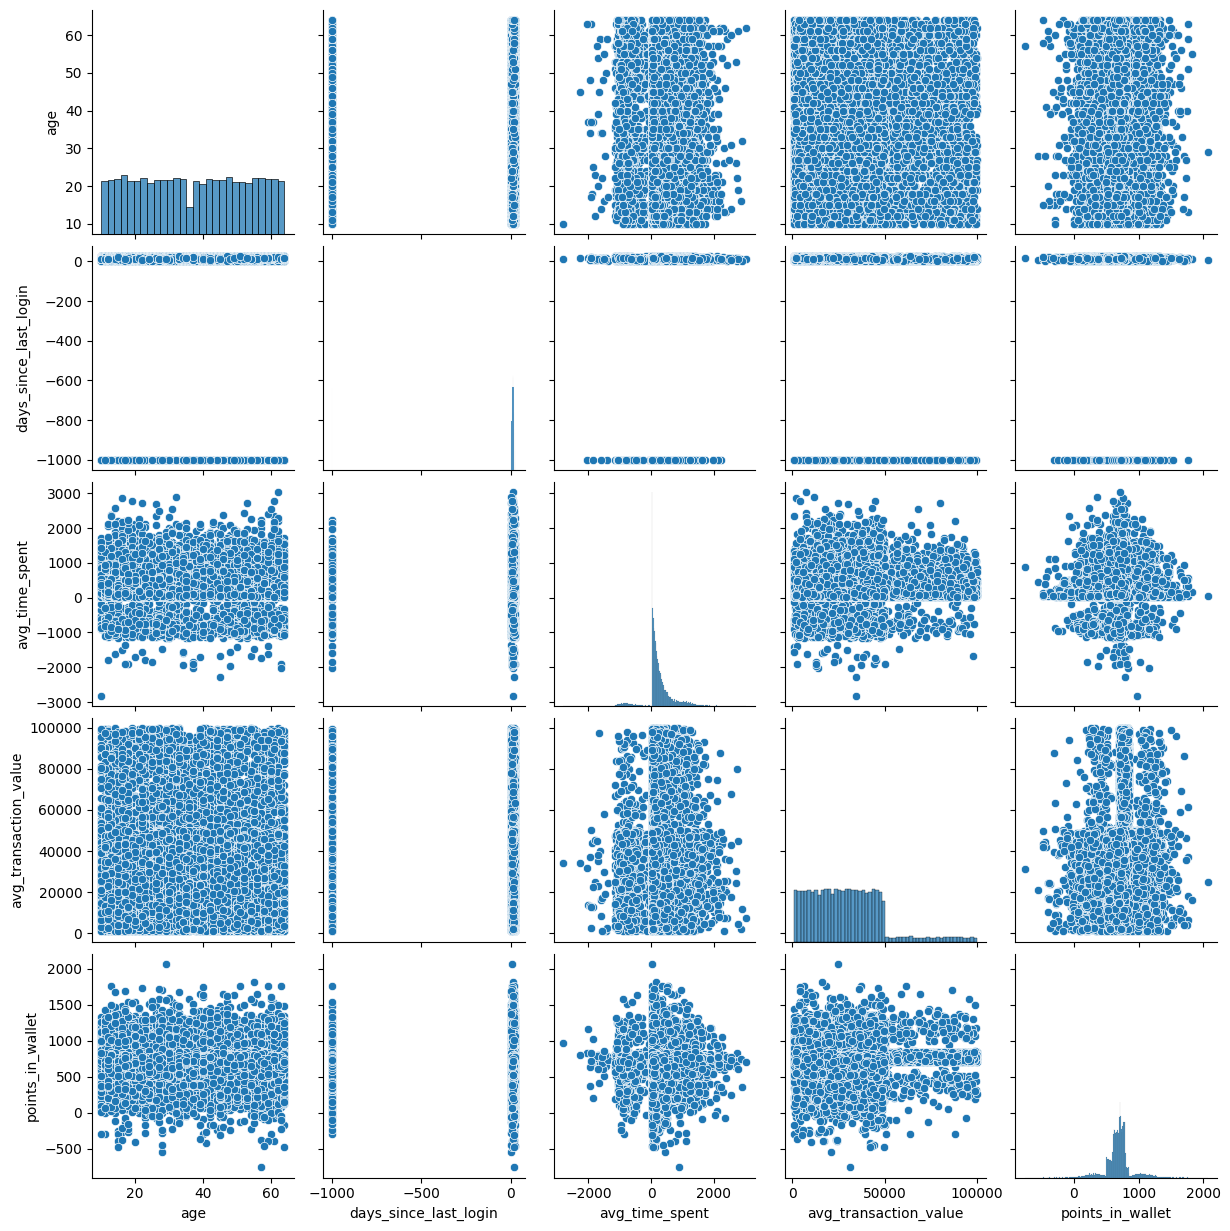

In [ ]:
import seaborn as sns
sns.pairplot(df)

# **Scaling the Data**

In [ ]:
## Scaling the Data

from sklearn.preprocessing import StandardScaler



features_to_standardize = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the selected features and transform the data
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

## **Splitting the Data into Train and Testing Sets**

In [ ]:

# Creating the set of independent variables and the dependent variable
X = df.drop(["churn_risk_score","feedback"], axis=1)
y = df["churn_risk_score"]

In [ ]:
y.unique()

array([-1.08578914,  0.92098914])

In [ ]:
from sklearn.model_selection import train_test_split

## Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,age,gender,region_category,membership_category,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status
2,0.441667,0,1.0,0,1.0,1,0.247297,0.677323,-0.423371,-0.966943,4
3,0.001566,1,2.0,0,1.0,0,0.234333,-0.470409,-0.207139,-0.621627,3
4,-0.375663,0,2.0,0,0.0,0,0.273223,-0.321987,-0.245940,-0.129719,5
6,-1.004378,1,1.0,3,1.0,0,0.230012,-0.465178,-1.041617,0.350588,4
10,-0.752892,0,0.0,1,2.0,1,0.247297,0.811389,0.300022,0.059207,0


In [ ]:
# Let's check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [ ]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')


In [ ]:
## Importing the required metrics for Model Evaluation

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    roc_curve,)

In [ ]:
# !pip install memory_profiler

**Setting the seed.**

In [ ]:
import numpy as np

np.random.seed(1)

# **Building Logistic Regression Model**

## **LogisticRegression using Cross Validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time
# from memory_profiler import memory_usage

import time
import psutil

# Measuring start time
start_time = time.time()

# Measuring memory usage before and after model fitting
# mem_usage_before = memory_usage(-1, interval=0.1, timeout=1)



# Defining hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Inverse of regularization strength
    'solver': ['liblinear', 'saga']             # Algorithm to use in the optimization problem
}

# Creating Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_grid,
                                   n_iter=10, cv=10, scoring=['accuracy','recall','f1','roc_auc','balanced_accuracy'], refit="accuracy",random_state=1)
random_search.fit(x_train, y_train)

# Getting the best parameters and best score
best_params_logistic = random_search.best_params_
best_score_logistic = random_search.best_score_

In [ ]:
# Getting the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

print(f'The best parameters after hyperparamter tuning are: {best_params_logistic}')
print(f"The best score after the hypeparamter tuning is: {best_score_logistic}")

The best parameters after hyperparamter tuning are: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
The best score after the hypeparamter tuning is: 0.845020624631703


**From the above, it can be observed that the best parameters for the logistic regresison model to predict customer churn are "{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}" and the best score is about 84.50%**

# **Evaluation of Logistic Regression using the Training Data**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Training the model with the best parameters
best_logistic_model = LogisticRegression(**best_params_logistic, random_state=1)
best_logistic_model = best_logistic_model.fit(x_train, y_train)

# Getting cross-validated predictions
# cv_predictions_logistic_train = cross_val_predict(best_logistic_model, x_train, y_train, cv=10)
# Getting cross-validated predictions
cv_predictions_logistic_train = best_logistic_model.predict(x_train)#, y_train, cv=10)

# Getting the positive class probabilities (probability of being class 1)
# positive_class_probabilities = cv_predictions_logistic_train[:, 1]

# Calculating ROC AUC
roc_auc_logistic_train = roc_auc_score(y_train, cv_predictions_logistic_train)

# Calculating performance metrics based on cross-validated predictions
train_cv_acc_logistic = metrics.accuracy_score(y_train, cv_predictions_logistic_train)
train_cv_recall_logistic = metrics.recall_score(y_train, cv_predictions_logistic_train)
train_cv_precision_logistic = metrics.precision_score(y_train, cv_predictions_logistic_train)
train_cv_f1_logistic = metrics.f1_score(y_train, cv_predictions_logistic_train)

# Printing the cross-validated performance metrics
print('The metrics for the training set using the cross-validation are: ')
print("Cross-Validated Accuracy:", train_cv_acc_logistic)
print("Cross-Validated Recall:", train_cv_recall_logistic)
print("Cross-Validated Precision:", train_cv_precision_logistic)
print("Cross-Validated F1 Score:", train_cv_f1_logistic)
print("ROC AUC:", roc_auc_logistic_train)

The metrics for the training set using the cross-validation are: 
Cross-Validated Accuracy: 0.845020624631703
Cross-Validated Recall: 0.8693132108486439
Cross-Validated Precision: 0.847080136402387
Cross-Validated F1 Score: 0.8580526770293608
ROC AUC: 0.8429750311846081


# **Time Consumption and Memory Occupancy of the Logistic Regression model to train the data.**

In [ ]:
# Record end time
end_time = time.time()

# Calculate execution time
execution_time_logistic = end_time - start_time

# Calculate memory usage
process = psutil.Process()
memory_used_logistic = process.memory_info().rss / (1024 * 1024)  # Convert to MiB

# Print results
print('Execution Time:', execution_time_logistic, 'seconds')
print('Memory Used:', memory_used_logistic, 'MiB')

Execution Time: 20.862820148468018 seconds
Memory Used: 232.40234375 MiB


# **Evaluation of Logistic Regression using the Testing Data**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Specifying the logistic regression model
# model = LogisticRegression(solver="liblinear", random_state=1)

best_logistic_model.fit(x_test,y_test)

# Getting cross-validated predictions
# cv_predictions_logistic_test = cross_val_predict(best_logistic_model, x_test, y_test, cv=10)
# best_logistic_model.fit(x_test,y_test)


# Getting cross-validated predictions
cv_predictions_logistic_test = best_logistic_model.predict(x_test)#, y_train, cv=10)


# Calculating performance metrics based on cross-validated predictions
test_cv_acc_logistic = metrics.accuracy_score(y_test, cv_predictions_logistic_test)
test_cv_recall_logistic = metrics.recall_score(y_test, cv_predictions_logistic_test)
test_cv_precision_logistic = metrics.precision_score(y_test, cv_predictions_logistic_test)
test_cv_f1_logistic = metrics.f1_score(y_test, cv_predictions_logistic_test)
# Calculating ROC AUC
roc_auc_logistic_test = roc_auc_score(y_test, cv_predictions_logistic_test)


# Printing the cross-validated performance metrics
print('The metrics for the testing set using the cross-validation are: ')
print("Cross-Validated Accuracy:", test_cv_acc_logistic)
print("Cross-Validated Recall:", test_cv_recall_logistic)
print("Cross-Validated Precision:", test_cv_precision_logistic)
print("Cross-Validated F1 Score:", test_cv_f1_logistic)
print("ROC AUC:", roc_auc_logistic_test)


The metrics for the testing set using the cross-validation are: 
Cross-Validated Accuracy: 0.8403904316744569
Cross-Validated Recall: 0.8595951831924161
Cross-Validated Precision: 0.8455141129032258
Cross-Validated F1 Score: 0.85249650616186
ROC AUC: 0.8388750166926185


# **ROC Curve - Logistic Regression**

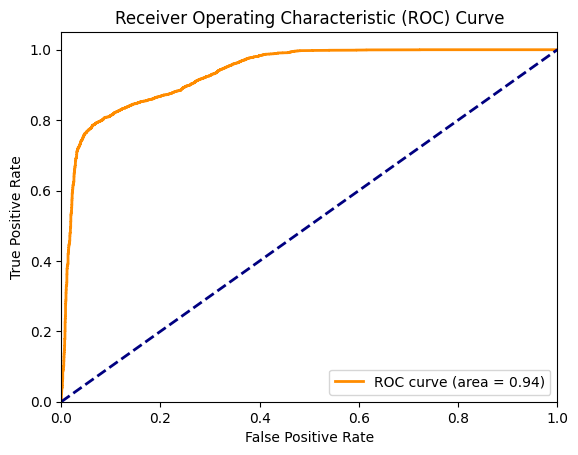

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
y_probs_logistic = best_logistic_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_logistic)

# Compute ROC area under the curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**From the above ROC curve, it can be seen that the logistic regression is distinguishing better between both the classes - positive and negative. It can be gleaned from the fact that the area under the curve is more than 0.5. It reached to 1.0 towards the end.**

# **Training and Testing metrics for Logistic Regression**

In [ ]:
import pandas as pd
# Creating DataFrame
logreg_output = pd.DataFrame({
    'Training': [train_cv_acc_logistic, train_cv_recall_logistic, train_cv_precision_logistic, train_cv_f1_logistic,roc_auc_logistic_train],
    'Testing': [test_cv_acc_logistic, test_cv_recall_logistic, test_cv_precision_logistic, test_cv_f1_logistic,roc_auc_logistic_test]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC'])
print("The metrics for Logistic Regression are: ")
logreg_output

The metrics for Logistic Regression are: 


,Training,Testing
Accuracy,0.845021,0.840390
Recall,0.869313,0.859595
Precision,0.847080,0.845514
F1,0.858053,0.852497
ROC_AUC,0.842975,0.838875


**From the above metrics, it can be observed that there is no possible chance of overfitting in the Logistic Regresison Model. Additionally, the test set accuracy of 84.03% explains that Logistic Regression is performing better on unseen data to predict the customer churn. Furthermore, the 'Recall' score is also good with 85.95% on the unseen data.**

# **Variable Importance from Logistic Regression**

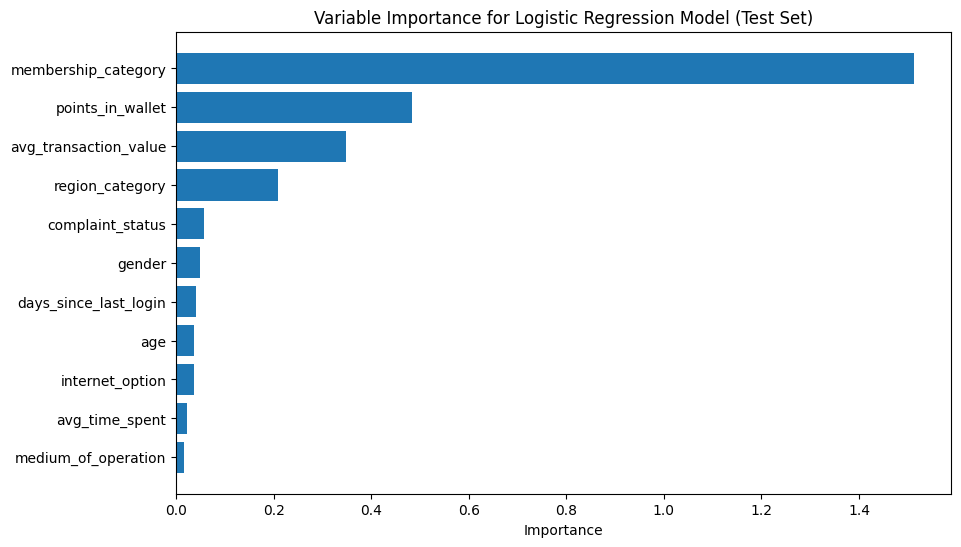

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Getting the coefficients (weights) of the features
coefficients = best_logistic_model.coef_[0]

# Getting the absolute values of the coefficients to represent importance
importance = np.abs(coefficients)

# Getting the names of the features
feature_names = x_test.columns

# Sorting the features based on their importance
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Variable Importance for Logistic Regression Model (Test Set)')
plt.gca().invert_yaxis()
plt.show()


**From the variable importance graph it can be seen that "membership_category" is appeared to be the most important for the churn prediction of this organization. The importance value of the membership is very high compared to the other important variables in the data. In addition to "membership_category"; "region_category" and "complaint_status" have found to be important variables as well.**

# **Confusion Matrix for Training and Testing Data of LogisticRegression**

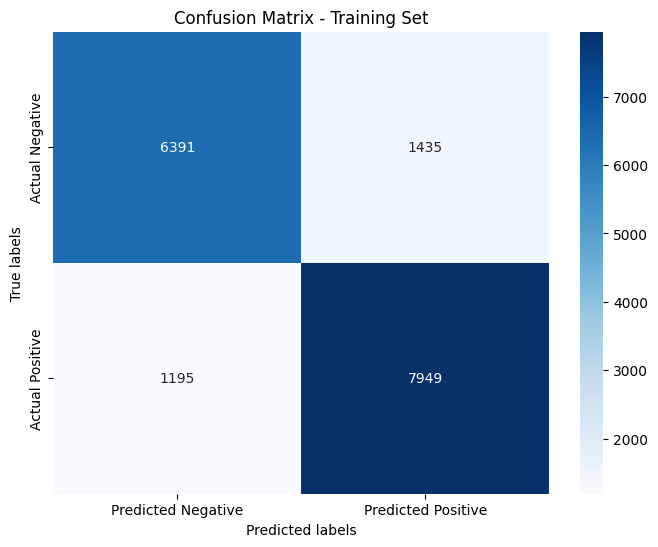

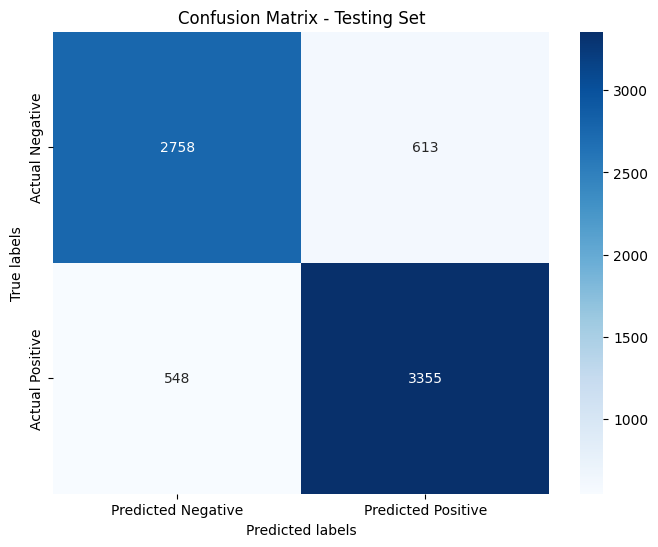

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for training set
# Get cross-validated predictions
# cv_predictions = cross_val_predict(best_logistic_model, x_train, y_train, cv=10)
conf_matrix_train = confusion_matrix(y_train, cv_predictions_logistic_train)

# Plotting confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Generate confusion matrix for testing set
# cv_predictions = cross_val_predict(best_logistic_model, x_test, y_test, cv=10)
conf_matrix_test = confusion_matrix(y_test, cv_predictions_logistic_test)

# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()

# Calculating specificity and sensitivity
specificity_logistic_train = tn_train / (tn_train + fp_train)
sensitivity_logistic_train = tp_train / (tp_train + fn_train)




# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculating specificity and sensitivity
specificity_logistic_test = tn_test / (tn_test + fp_test)
sensitivity_logistic_test = tp_test / (tp_test + fn_test)


print(f"The Sensitivity and Specificity of the Logistic Regression on the training data:\nSpecificity:{specificity_logistic_train}\nSensitivity:{sensitivity_logistic_train}\n\n")
print(f"The Sensitivity and Specificity of the Logistic Regression on the testing data:\nSpecificity:{specificity_logistic_test}\nSensitivity:{sensitivity_logistic_test}")



The Sensitivity and Specificity of the Logistic Regression on the training data:
Specificity:0.8166368515205724
Sensitivity:0.8693132108486439


The Sensitivity and Specificity of the Logistic Regression on the testing data:
Specificity:0.8181548501928211
Sensitivity:0.8595951831924161


# **Final Evaluation Metrics of Logistic Regression**

In [ ]:
import pandas as pd
# Creating DataFrame
logreg_output = pd.DataFrame({
    'Training': [train_cv_acc_logistic, train_cv_recall_logistic, train_cv_precision_logistic, train_cv_f1_logistic,roc_auc_logistic_train,
                 specificity_logistic_train,sensitivity_logistic_train],
    'Testing': [test_cv_acc_logistic, test_cv_recall_logistic, test_cv_precision_logistic, test_cv_f1_logistic,roc_auc_logistic_test,
                specificity_logistic_test, sensitivity_logistic_test]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC','Specificity','Sensitivity'])
print("The metrics for Logistic Regression are: ")
logreg_output

The metrics for Logistic Regression are: 


,Training,Testing
Accuracy,0.845021,0.840390
Recall,0.869313,0.859595
Precision,0.847080,0.845514
F1,0.858053,0.852497
ROC_AUC,0.842975,0.838875
Specificity,0.816637,0.818155
Sensitivity,0.869313,0.859595


# **Support Vector Machine Using Cross Validation - Training Data**

In [ ]:
import time
import psutil
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Measuring start time
start_time = time.time()

# Measuring memory usage before and after model fitting
# mem_usage_before = memory_usage(-1, interval=0.1, timeout=1)

# Defining hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear','rbf','sigmoid','poly'],                       # 'linear' for linear kernel
}

# Creating SVM model with linear kernel
svm_linear_model = SVC(random_state=1)

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_linear_model, param_distributions=param_grid,
                                   n_iter=10, cv=10, scoring=['accuracy', 'recall','f1','roc_auc','balanced_accuracy'], refit="accuracy", random_state=1)
random_search.fit(x_train, y_train)

# Getting the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_


print(f"\nThe best hyperparameters for SVM are:\n{best_params}\n")
print(f"Thes best score for SVM is:\n{best_score}")

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
# Training the model with the best parameters
best_svm_linear_model = SVC(**best_params, random_state=1)
best_svm_linear_model.fit(x_train, y_train)

# Getting cross-validated predictions
# cv_predictions_svm_linear_train = cross_val_predict(best_svm_linear_model, x_train, y_train, cv=10)



# Getting cross-validated predictions
cv_predictions_svm_linear_train = best_svm_linear_model.predict(x_train) #, y_train, cv=10)


# Calculating performance metrics based on cross-validated predictions
train_cv_acc_svm_linear = metrics.accuracy_score(y_train, cv_predictions_svm_linear_train)
train_cv_recall_svm_linear = metrics.recall_score(y_train, cv_predictions_svm_linear_train)
train_cv_precision_svm_linear = metrics.precision_score(y_train, cv_predictions_svm_linear_train)
train_cv_f1_svm_linear = metrics.f1_score(y_train, cv_predictions_svm_linear_train)
# Calculating ROC AUC
roc_auc_train_svm = roc_auc_score(y_train, cv_predictions_logistic_train)


# Printing the cross-validated performance metrics
print('The metrics for the training set using the cross-validation are: ')
print("Cross-Validated Accuracy:", train_cv_acc_svm_linear)
print("Cross-Validated Recall:", train_cv_recall_svm_linear)
print("Cross-Validated Precision:", train_cv_precision_svm_linear)
print("Cross-Validated F1 Score:", train_cv_f1_svm_linear)
print("Cross-Validated ROC_AUC Score:", roc_auc_train_svm)

The metrics for the training set using the cross-validation are: 
Cross-Validated Accuracy: 0.9121979964643488
Cross-Validated Recall: 0.9195100612423447
Cross-Validated Precision: 0.917703558175071
Cross-Validated F1 Score: 0.918605921555774
Cross-Validated ROC_AUC Score: 0.8430026579861775


In [ ]:
# Record end time
end_time = time.time()

# Calculate execution time
execution_time_svm = end_time - start_time

# Calculate memory usage
process = psutil.Process()
memory_used_svm = process.memory_info().rss / (1024 * 1024)  # Convert to MiB

# Print results
print('Execution Time:', execution_time_svm, 'seconds')
print('Memory Used:', memory_used_svm, 'MiB')

Execution Time: 4434.311638832092 seconds
Memory Used: 537.2265625 MiB


# **Support Vector Machine Using Cross Validation - Testing Data**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Specify the logistic regression model
# model = LogisticRegression(solver="liblinear", random_state=1)

# Getting cross-validated predictions
cv_predictions_SVM_test = cross_val_predict(best_svm_linear_model, x_test, y_test, cv=10)

# Calculating performance metrics based on cross-validated predictions
test_cv_acc_SVM = metrics.accuracy_score(y_test, cv_predictions_SVM_test)
test_cv_recall_SVM = metrics.recall_score(y_test, cv_predictions_SVM_test)
test_cv_precision_SVM = metrics.precision_score(y_test, cv_predictions_SVM_test)
test_cv_f1_SVM = metrics.f1_score(y_test, cv_predictions_SVM_test)
roc_auc_test_svm = roc_auc_score(y_test, cv_predictions_SVM_test)

# Printing the cross-validated performance metrics
print('The metrics for the testing set using the cross-validation are: ')
print("Cross-Validated Accuracy:", test_cv_acc_SVM)
print("Cross-Validated Recall:", test_cv_recall_SVM)
print("Cross-Validated Precision:", test_cv_precision_SVM)
print("Cross-Validated F1 Score:", test_cv_f1_SVM)
print("Cross-Validated ROC_AUC Score:", roc_auc_test_svm)


The metrics for the testing set using the cross-validation are: 
Cross-Validated Accuracy: 0.8902941985152598
Cross-Validated Recall: 0.8993082244427364
Cross-Validated Precision: 0.896551724137931
Cross-Validated F1 Score: 0.8979278587874137
Cross-Validated ROC_AUC Score: 0.8895829167304159


# **Metrics for the SVM - Train and Test**

In [ ]:
import pandas as pd
# Creating DataFrame
svm_output = pd.DataFrame({
    'Training': [train_cv_acc_svm_linear, train_cv_recall_svm_linear, train_cv_precision_svm_linear, train_cv_f1_svm_linear,roc_auc_train_svm],
    'Testing': [test_cv_acc_SVM, test_cv_recall_SVM, test_cv_precision_SVM, test_cv_f1_SVM,roc_auc_test_svm]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC'])
print("The metrics for SVM are: ")
svm_output

The metrics for SVM are: 


,Training,Testing
Accuracy,0.912198,0.890294
Recall,0.919510,0.899308
Precision,0.917704,0.896552
F1,0.918606,0.897928
ROC_AUC,0.843003,0.889583


* **The SVM is performing better than the logistic regression in this phase. Furthermore, the accuracy of 89.02% informs us that SVM is performing so wellthan the LR model whose accuracy is about 84.03%.**

* **The recall is also occured to be so good at 89.93%.**

* **Let's see by building other models.**

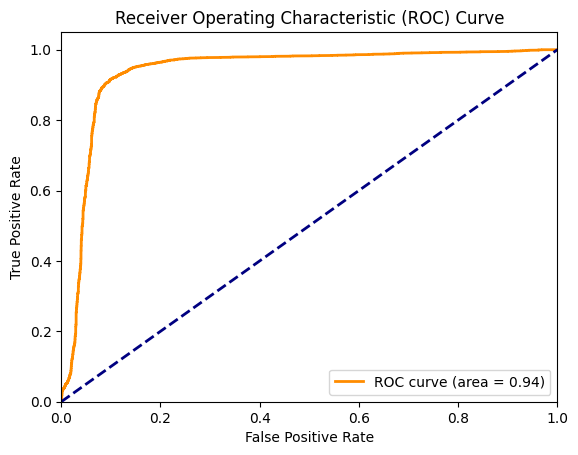

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get decision values
decision_values = best_svm_linear_model.decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_values)

# Compute ROC area under the curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**From the above ROC curve, it can be seen that the SVM is distinguishing better between both the classes - positive and negative. It can be gleaned from the fact that the area under the cruve is more than 0.5 and is almost near to 1. Also, the ROC curve is even more better than that of the logistic regression.**

# **Variable Importance for SVM**

In [ ]:
import matplotlib.pyplot as plt

# Checking if the model is a linear SVM
if best_svm_linear_model.kernel == 'linear':
    # Getting feature coefficients
    feature_coefficients = best_svm_linear_model.coef_[0]

    # Mapping coefficients to feature names
    feature_names = df.drop(columns=['churn_risk_score','feedback']) # df.columns[:-2]  # Exclude the target variable
    coefficient_dict = dict(zip(feature_names, feature_coefficients))

    # Sorting feature coefficients by absolute value
    sorted_coefficients = sorted(coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)

    # Extracting sorted feature names and coefficients
    sorted_feature_names = [item[0] for item in sorted_coefficients]
    sorted_coefficients = [item[1] for item in sorted_coefficients]

    # Plotting the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_coefficients)
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importances for Linear SVM')
    plt.show()
else:
    print("Feature importances are not available for non-linear SVMs.")



# feature_names = df.drop(columns=['churn_risk_score','feedback'])
# feature_names

Feature importances are not available for non-linear SVMs.


 **From the variable importance graph it can be seen that "membership_category" is appeared to be the most important again for the churn prediction of this organization and the coefficient value is in the negative direction. In addition to "membership_category", sentiment label and sentiment score also seem to impactful for the churn prediction with "label" having the importance value in the negative direction and "score" is having the importance value or coefficient value in the positive direction. These are also found to be relatively important which is seen in the logistic regression as well.**

# **Confusion Matrix for Support Vector Machine**

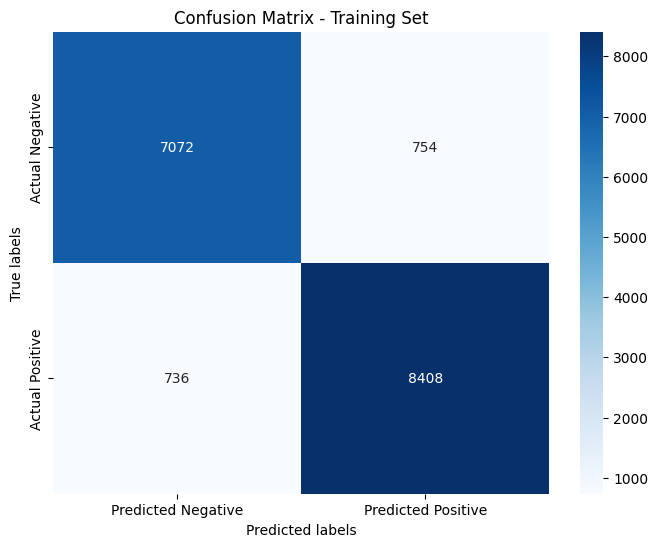

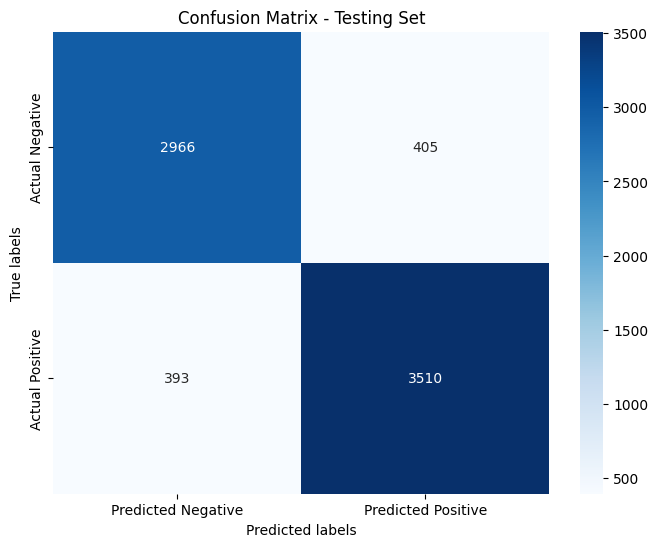

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix for the training set
# Getting cross-validated predictions
# cv_predictions_train = cross_val_predict(best_svm_linear_model, x_train, y_train, cv=5)
conf_matrix_train = confusion_matrix(y_train, cv_predictions_svm_linear_train)

# Plotting confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Generating confusion matrix for testing set
# cv_predictions_test = cross_val_predict(best_svm_linear_model, x_test, y_test, cv=5)
conf_matrix_test = confusion_matrix(y_test, cv_predictions_SVM_test)

# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()

# Calculating specificity and sensitivity
specificity_svm_train = tn_train / (tn_train + fp_train)
sensitivity_svm_train = tp_train / (tp_train + fn_train)




# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculating specificity and sensitivity
specificity_svm_test = tn_test / (tn_test + fp_test)
sensitivity_svm_test = tp_test / (tp_test + fn_test)


print(f"The Sensitivity and Specificity of the Logistic Regression on the training data:\nSpecificity:{specificity_svm_train}\nSensitivity:{sensitivity_svm_train}\n\n")
print(f"The Sensitivity and Specificity of the Logistic Regression on the testing data:\nSpecificity:{specificity_svm_test}\nSensitivity:{sensitivity_svm_test}")



The Sensitivity and Specificity of the Logistic Regression on the training data:
Specificity:0.9036544850498339
Sensitivity:0.9195100612423447


The Sensitivity and Specificity of the Logistic Regression on the testing data:
Specificity:0.8798576090180955
Sensitivity:0.8993082244427364


In [ ]:
import pandas as pd
# Creating DataFrame
svm_output = pd.DataFrame({
    'Training': [train_cv_acc_svm_linear, train_cv_recall_svm_linear, train_cv_precision_svm_linear, train_cv_f1_svm_linear,roc_auc_train_svm,specificity_svm_train,
                 sensitivity_svm_train],
    'Testing': [test_cv_acc_SVM, test_cv_recall_SVM, test_cv_precision_SVM, test_cv_f1_SVM,roc_auc_test_svm,specificity_svm_test,sensitivity_svm_test]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC','Specificity','Sensitivity'])
print("The metrics for SVM are: ")
svm_output

The metrics for SVM are: 


,Training,Testing
Accuracy,0.912198,0.890294
Recall,0.919510,0.899308
Precision,0.917704,0.896552
F1,0.918606,0.897928
ROC_AUC,0.843003,0.889583
Specificity,0.903654,0.879858
Sensitivity,0.919510,0.899308


In [ ]:
from sklearn.naive_bayes import  GaussianNB



# **Random Forest Model with the Training Data**

In [ ]:
from sklearn import metrics
import time
import psutil

from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


# Measure start time
start_time = time.time()

# Measure memory usage before and after model fitting
# mem_usage_before = memory_usage(-1, interval=0.1, timeout=1)

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Creating Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=10, cv=10, scoring=['accuracy','recall','f1','roc_auc','balanced_accuracy'], refit="accuracy", random_state=1)
random_search.fit(x_train, y_train)

# Getting the best parameters and best score
best_params_rf = random_search.best_params_
best_score_rf = random_search.best_score_

print(f"\nThe best hyperparameters for SVM are:\n{best_params_rf}\n")
print(f"Thes best score for SVM is:\n{best_score_rf}")



The best hyperparameters for SVM are:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}

Thes best score for SVM is:
0.9413671184443135


**From the above hyperparameter tuning process, it can be observed that the following are the best paramters "{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}" with the score of 94.13%.**

In [ ]:

# Training the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=1)
best_rf_model = best_rf_model.fit(x_train, y_train)

# Getting cross-validated predictions
cv_predictions_rf_train = best_rf_model.predict(x_train) #, y_train, cv=10)



# Calculating performance metrics based on cross-validated predictions
train_cv_acc_rf = metrics.accuracy_score(y_train, cv_predictions_rf_train)
train_cv_recall_rf = metrics.recall_score(y_train, cv_predictions_rf_train)
train_cv_precision_rf = metrics.precision_score(y_train, cv_predictions_rf_train)
train_cv_f1_rf = metrics.f1_score(y_train, cv_predictions_rf_train)
# Calculating ROC AUC
roc_auc_train_rf = roc_auc_score(y_train, cv_predictions_rf_train)



# Printing the cross-validated performance metrics
print('The metrics for the training set using the cross-validation are: ')
print("Cross-Validated Accuracy:", train_cv_acc_rf)
print("Cross-Validated Recall:", train_cv_recall_rf)
print("Cross-Validated Precision:", train_cv_precision_rf)
print("Cross-Validated F1 Score:", train_cv_f1_rf)
print("Cross-Validated ROC_AUC Score:", roc_auc_train_rf)

The metrics for the training set using the cross-validation are: 
Cross-Validated Accuracy: 0.9829110194460813
Cross-Validated Recall: 0.9992344706911636
Cross-Validated Precision: 0.9699575371549893
Cross-Validated F1 Score: 0.984378366731308
Cross-Validated ROC_AUC Score: 0.9815364788927324


In [ ]:
# Record end time
end_time = time.time()

# Calculate execution time
execution_time_rf = end_time - start_time

# Calculate memory usage
process = psutil.Process()
memory_used_rf = process.memory_info().rss / (1024 * 1024)  # Convert to MiB

# Print results
print('Execution Time:', execution_time_rf, 'seconds')
print('Memory Used:', memory_used_rf, 'MiB')

Execution Time: 660.8399305343628 seconds
Memory Used: 314.5859375 MiB


# **Random Forest Model with the Testing Data**

In [ ]:

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Getting cross-validated predictions
cv_predictions_rf_test = best_rf_model.predict(x_test) #, y_train, cv=10)

# Calculating performance metrics based on cross-validated predictions
test_cv_acc_rf = metrics.accuracy_score(y_test, cv_predictions_rf_test)
test_cv_recall_rf = metrics.recall_score(y_test, cv_predictions_rf_test)
test_cv_precision_rf = metrics.precision_score(y_test, cv_predictions_rf_test)
test_cv_f1_rf = metrics.f1_score(y_test, cv_predictions_rf_test)
# Calculating ROC AUC
roc_auc_test_rf = roc_auc_score(y_test, cv_predictions_rf_test)

# Printing the cross-validated performance metrics
print('The metrics for the testing set using the cross-validation are: ')
print("Cross-Validated Accuracy:", test_cv_acc_rf)
print("Cross-Validated Recall:", test_cv_recall_rf)
print("Cross-Validated Precision:", test_cv_precision_rf)
print("Cross-Validated F1 Score:", test_cv_f1_rf)
print("Cross-Validated ROC_AUC Score:", roc_auc_test_rf)


The metrics for the testing set using the cross-validation are: 
Cross-Validated Accuracy: 0.9403354412977729
Cross-Validated Recall: 0.9400461183704842
Cross-Validated Precision: 0.9483070560868442
Cross-Validated F1 Score: 0.9441585177560473
Cross-Validated ROC_AUC Score: 0.9403582712884756


# **Metrics for the Random Forest - Train and Test**

In [ ]:
import pandas as pd
# Creating DataFrame
rf_output = pd.DataFrame({
    'Training': [train_cv_acc_rf, train_cv_recall_rf, train_cv_precision_rf, train_cv_f1_rf,roc_auc_train_rf],
    'Testing': [test_cv_acc_rf, test_cv_recall_rf, test_cv_precision_rf, test_cv_f1_rf,roc_auc_test_rf]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC'])
print("The metrics for the Random Forest are: ")
rf_output

The metrics for the Random Forest are: 


,Training,Testing
Accuracy,0.982911,0.940335
Recall,0.999234,0.940046
Precision,0.969958,0.948307
F1,0.984378,0.944159
ROC_AUC,0.981536,0.940358


* **The above are the evaluation metrics of the Random Forest Model on the training and testing set. The Random Forest is performing well in identifying and predicting the customer churn on the new and unseen data.**

* **Also, the predictive accuracy of 94.03% is way better than the Logistic Regression and SVM.**

* **Finally, the recall is also observed to be very high with 94.00%. This is also an interesting metric and point that can be noted.**



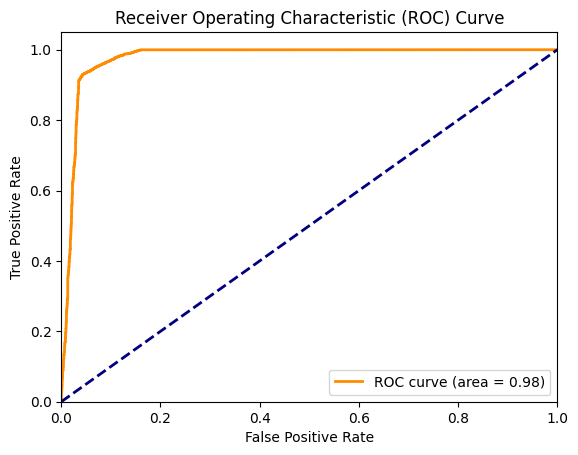

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
y_probs_rf = best_rf_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

# Compute ROC area under the curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**From the above ROC curve, it can be seen that the Random Forest is distinguishing so great between both the classes - positive and negative. It can be gleaned from the fact that the area under the cruve is more than 0.5 and is approximately equal to 1. Furthermore, RF is observed to be distinguishing better in both the instances till now compared to the previous models of Logistic Regression and SVM.**

In [ ]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'points_in_wallet',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'score'],
      dtype='object')

# **Variable Importances for the Random Forest**

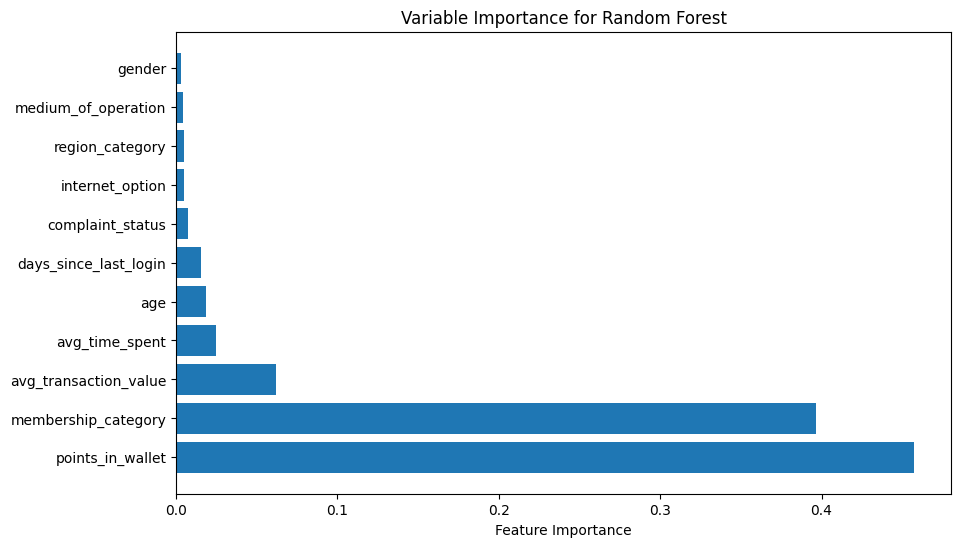

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Exclude the target variable
feature_names = df.columns.drop(['churn_risk_score', 'feedback'])

# Getting feature importances
feature_importances = best_rf_model.feature_importances_

# Sorting feature importances and feature names by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.title('Variable Importance for Random Forest')
plt.show()


 * **From the variable importance graph it can be seen that points_in_wallet appeared to be most impotant with Random Forest along with membership_category in the second place for the churn prediction of this organization. In addition to membership_category, "score" and "avg_transaction_value" also found to be relatively important which is seen in the logistic regression and Linear SVM as well.**

 * **It can be observed that among the newly added variables "score" and "label", the "score" variable is appeared to be having more importance for the churn prediction in the RF. Nonetheless, the importance value is relatively low compared to "membership_category" and "points_in_wallet".**

# **Confusion Matrix for the Random Forest**

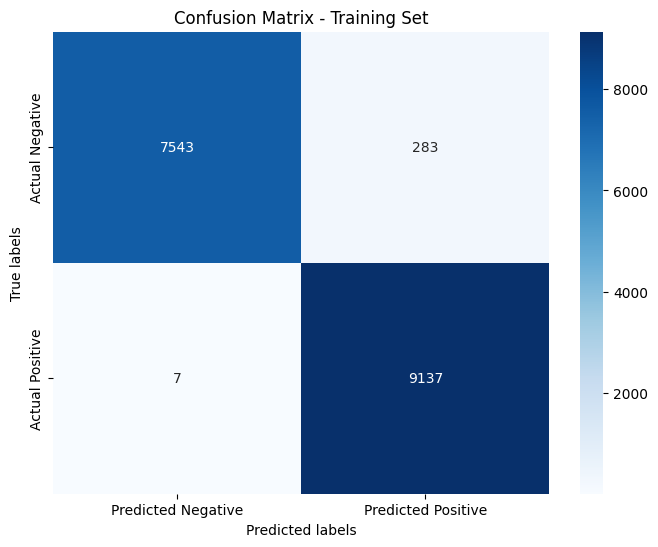

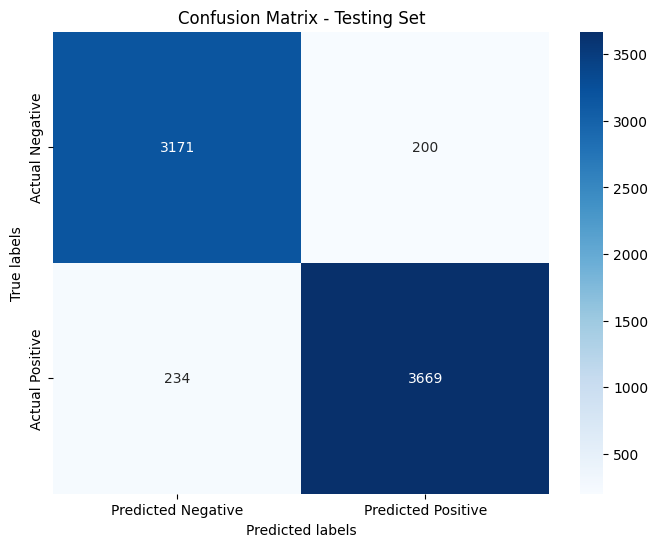

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix for training set
# Getting cross-validated predictions
# cv_predictions = cross_val_predict(best_rf_model, x_train, y_train, cv=5)
conf_matrix_train = confusion_matrix(y_train, cv_predictions_rf_train)

# Plotting confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Generating confusion matrix for testing set
# cv_predictions = cross_val_predict(best_rf_model, x_test, y_test, cv=5)
conf_matrix_test = confusion_matrix(y_test, cv_predictions_rf_test)

# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()

# Calculating specificity and sensitivity
specificity_rf_train = tn_train / (tn_train + fp_train)
sensitivity_rf_train = tp_train / (tp_train + fn_train)




# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculating specificity and sensitivity
specificity_rf_test = tn_test / (tn_test + fp_test)
sensitivity_rf_test = tp_test / (tp_test + fn_test)


print(f"The Sensitivity and Specificity of the Logistic Regression on the training data:\nSpecificity:{specificity_rf_train}\nSensitivity:{sensitivity_rf_train}\n\n")
print(f"The Sensitivity and Specificity of the Logistic Regression on the testing data:\nSpecificity:{specificity_rf_test}\nSensitivity:{sensitivity_rf_test}")



The Sensitivity and Specificity of the Logistic Regression on the training data:
Specificity:0.9638384870943011
Sensitivity:0.9992344706911636


The Sensitivity and Specificity of the Logistic Regression on the testing data:
Specificity:0.940670424206467
Sensitivity:0.9400461183704842


In [ ]:
import pandas as pd
# Creating DataFrame
rf_output = pd.DataFrame({
    'Training': [train_cv_acc_rf, train_cv_recall_rf, train_cv_precision_rf, train_cv_f1_rf,roc_auc_train_rf,
                 specificity_rf_train,sensitivity_rf_train],
    'Testing': [test_cv_acc_rf, test_cv_recall_rf, test_cv_precision_rf, test_cv_f1_rf,roc_auc_test_rf,
                specificity_rf_test,sensitivity_rf_test]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC','Specificity','Sensitivity'])
print("The metrics for the Random Forest are: ")
rf_output

The metrics for the Random Forest are: 


,Training,Testing
Accuracy,0.982911,0.940335
Recall,0.999234,0.940046
Precision,0.969958,0.948307
F1,0.984378,0.944159
ROC_AUC,0.981536,0.940358
Specificity,0.963838,0.940670
Sensitivity,0.999234,0.940046


# **Working with LighGBM Model**

In [ ]:
!pip install LightGBM

In [ ]:
# import lightgbm as lgb

In [ ]:
# # Specify the LightGBM model
# lgb_model = lgb.LGBMClassifier(random_state=1)


In [ ]:
# # Fit the model on the training set
# lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9144, number of negative: 7826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 16970, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538833 -> initscore=0.155646
[LightGBM] [Info] Start training from score 0.155646


LGBMClassifier(random_state=1)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Measure start time
start_time = time.time()

# Measure memory usage before and after model fitting
# mem_usage_before = memory_usage(-1, interval=0.1, timeout=1)

# Defining hyperparameter grid
param_grid = {
    'num_leaves': [20, 30, 40],                # Maximum number of leaves in one tree
    'max_depth': [-1, 10, 20, 30],             # Maximum depth of the tree
    'learning_rate': [0.01, 0.05, 0.1],        # Learning rate
    'n_estimators': [100, 200, 300],           # Number of boosting iterations
    'reg_alpha': [0.0, 0.1, 0.5],              # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.5]               # L2 regularization term on weights
}

# Building the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=1)

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid,
                                   n_iter=10, cv=10, scoring=['accuracy','recall','f1','roc_auc','balanced_accuracy'], refit="accuracy", random_state=1)
random_search.fit(x_train, y_train)

# Getting the best parameters and best score
best_params_lightgbm = random_search.best_params_
best_score_lightgbm = random_search.best_score_



print(f"\nThe best hyperparameters for LightGBM are:\n{best_params_lightgbm}\n")
print(f"Thes best score for LightGBM is:\n{best_score_lightgbm}")

[LightGBM] [Info] Number of positive: 8230, number of negative: 7043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 15273, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538859 -> initscore=0.155752
[LightGBM] [Info] Start training from score 0.155752
[LightGBM] [Info] Number of positive: 8230, number of negative: 7043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 15273, number of used features: 11
[LightGBM] [Info] [binary:

In [ ]:

print(f"\nThe best hyperparameters for LightGBM are:\n{best_params_lightgbm}\n")
print(f"Thes best score for LightGBM is:\n{best_score_lightgbm}")


The best hyperparameters for LightGBM are:
{'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 20, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}

Thes best score for LightGBM is:
0.9420742486741307


# **Building LightGBM Model on the Training Data**

In [ ]:
# Training the model with the best parameters
best_lgb_model = lgb.LGBMClassifier(**best_params_lightgbm, random_state=1)
best_lgb_model = best_lgb_model.fit(x_train, y_train)

# Getting cross-validated predictions
# cv_predictions_lgb_train = cross_val_predict(best_lgb_model, x_train, y_train, cv=10)



# Getting cross-validated predictions
cv_predictions_lgb_train = best_lgb_model.predict(x_train) #, y_train, cv=10)


# Calculating performance metrics based on cross-validated predictions
train_cv_acc_lgb = accuracy_score(y_train, cv_predictions_lgb_train)
train_cv_recall_lgb = recall_score(y_train, cv_predictions_lgb_train)
train_cv_precision_lgb = precision_score(y_train, cv_predictions_lgb_train)
train_cv_f1_lgb = f1_score(y_train, cv_predictions_lgb_train)
# Calculating ROC AUC
roc_auc_train_lightgbm = roc_auc_score(y_train, cv_predictions_rf_train)




# Printing the cross-validated performance metrics
print('\n\n\n\nThe metrics for the training set using the cross-validation are: ')
print("Cross-Validated Accuracy:", train_cv_acc_lgb)
print("Cross-Validated Recall:", train_cv_recall_lgb)
print("Cross-Validated Precision:", train_cv_precision_lgb)
print("Cross-Validated F1 Score:", train_cv_f1_lgb)
print("Cross-Validated ROC_AUC Score:", roc_auc_train_lightgbm)

[LightGBM] [Info] Number of positive: 9144, number of negative: 7826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 16970, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538833 -> initscore=0.155646
[LightGBM] [Info] Start training from score 0.155646




The metrics for the training set using the cross-validation are: 
Cross-Validated Accuracy: 0.9465527401296405
Cross-Validated Recall: 0.9491469816272966
Cross-Validated Precision: 0.9515404012717904
Cross-Validated F1 Score: 0.9503421845058855
Cross-Validated ROC_AUC Score: 0.9815364788927324


In [ ]:
# Record end time
end_time = time.time()

# Calculate execution time
execution_time_lightgbm = end_time - start_time

# Calculate memory usage
process = psutil.Process()
memory_used_lightgbm = process.memory_info().rss / (1024 * 1024)  # Convert to MiB

# Print results
print('Execution Time:', execution_time_lightgbm, 'seconds')
print('Memory Used:', memory_used_lightgbm, 'MiB')

Execution Time: 119.19722080230713 seconds
Memory Used: 350.90234375 MiB


# **Building LightGBM Model on the Testing Data**

In [ ]:
# Testing the model with the best parameters
# best_lgb_model = lgb.LGBMClassifier(**best_params, random_state=1)
best_lgb_model.fit(x_test, y_test)

# Getting cross-validated predictions
# cv_predictions_lgb_test = cross_val_predict(best_lgb_model, x_test, y_test, cv=5)


# Getting cross-validated predictions
cv_predictions_lgb_test = best_lgb_model.predict(x_test)

# Calculating performance metrics based on cross-validated predictions
test_cv_acc_lgb = accuracy_score(y_test, cv_predictions_lgb_test)
test_cv_recall_lgb = recall_score(y_test, cv_predictions_lgb_test)
test_cv_precision_lgb = precision_score(y_test, cv_predictions_lgb_test)
test_cv_f1_lgb = f1_score(y_test, cv_predictions_lgb_test)
# Calculating ROC AUC
roc_auc_test_lightgbm = roc_auc_score(y_train, cv_predictions_rf_train)


# Printing the cross-validated performance metrics
print('\n\n\n\nThe metrics for the training set using the cross-validation are: ')
print("Cross-Validated Accuracy:", test_cv_acc_lgb)
print("Cross-Validated Recall:", test_cv_recall_lgb)
print("Cross-Validated Precision:", test_cv_precision_lgb)
print("Cross-Validated F1 Score:", test_cv_f1_lgb)
print("Cross-Validated ROC_AUC Score:", roc_auc_test_rf)

[LightGBM] [Info] Number of positive: 3903, number of negative: 3371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 7274, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536569 -> initscore=0.146536
[LightGBM] [Info] Start training from score 0.146536




The metrics for the training set using the cross-validation are: 
Cross-Validated Accuracy: 0.9532581798185318
Cross-Validated Recall: 0.9561875480399693
Cross-Validated Precision: 0.9566777749295052
Cross-Validated F1 Score: 0.9564325986673501
Cross-Validated ROC_AUC Score: 0.9403582712884756


# **Metrics of LightGBM - Train and Test**

In [ ]:
import pandas as pd
# Creating DataFrame
LightGBM_output = pd.DataFrame({
    'Training': [train_cv_acc_lgb, train_cv_recall_lgb, train_cv_precision_lgb, train_cv_f1_lgb,roc_auc_train_lightgbm],
    'Testing': [test_cv_acc_lgb, test_cv_recall_lgb, test_cv_precision_lgb, test_cv_f1_lgb,roc_auc_test_lightgbm]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC'])
print("The metrics for the LightGBM  are: ")
LightGBM_output

The metrics for the LightGBM  are: 


,Training,Testing
Accuracy,0.946553,0.953258
Recall,0.949147,0.956188
Precision,0.951540,0.956678
F1,0.950342,0.956433
ROC_AUC,0.981536,0.981536


* **From the metrics, it can be seen that the LightGBM is performing so well compared to all the the models for churn predicition with the highest testing accuracy of 95.32%.**

* **The recall value is also noteworthy with 95.61%.**

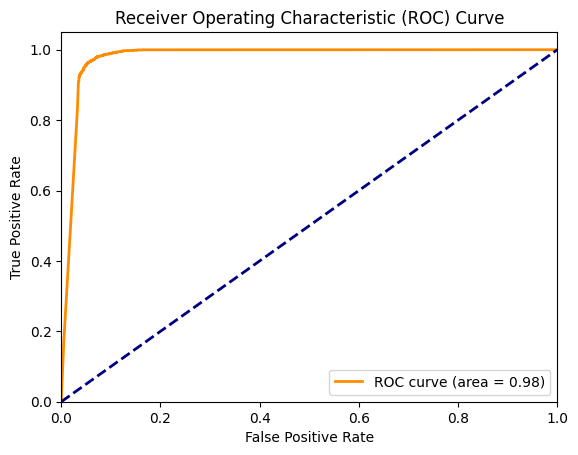

In [ ]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
y_probs_lightgbm = best_lgb_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lightgbm)

# Compute ROC area under the curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**LightGBM is performing much more better than the other models in distinguishing between the positive and negative classes. The area under the curve for lightgbm is more than the other models comparatively.**

# **Variable Importance for the LightGBM**

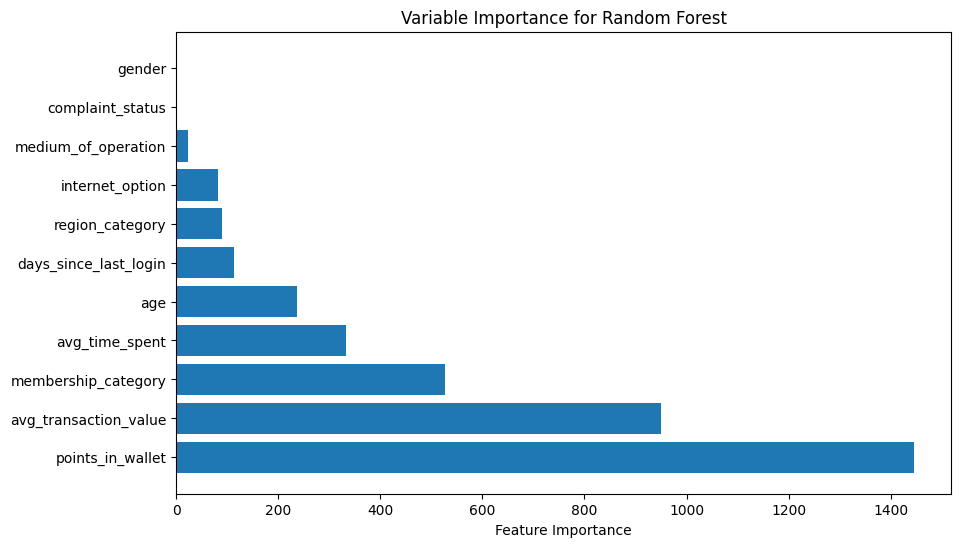

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Exclude the target variable
feature_names = df.columns.drop(['churn_risk_score', 'feedback'])

# Getting feature importances
feature_importances = best_lgb_model.feature_importances_

# Sorting feature importances and feature names by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.title('Variable Importance for Random Forest')
plt.show()


 * **From the variable importance graph it can be seen that "points_in_wallet" appeared to be most impotant variable again with LightGBM. Also,  "avg_transaction_value" is appeared to be in the second place for the churn prediction of this organization which is different from all the other models. In addition to "avg_transaction_value", "membership_category", also found to be relatively important which we is seen in the logistic regression, Linear SVM, and Random Forest as well.**

 * **The sentiment score variable "score" is also found to be impactful and is one of the most important variables in LightGBM.**

# **Confusion Matrix for the LightGBM Model**

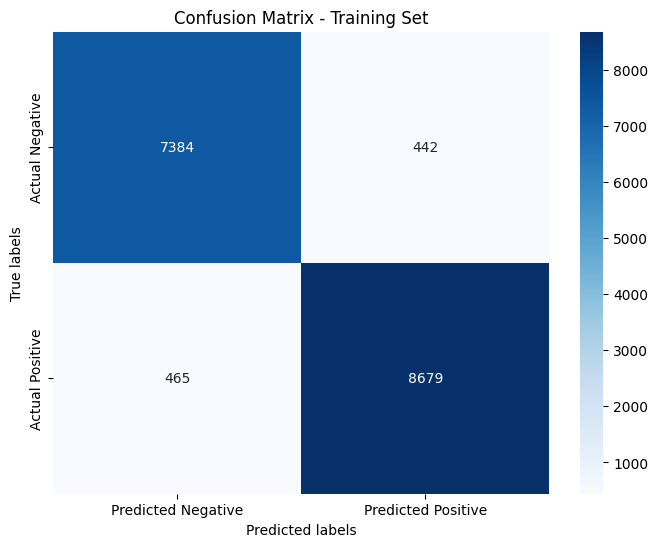

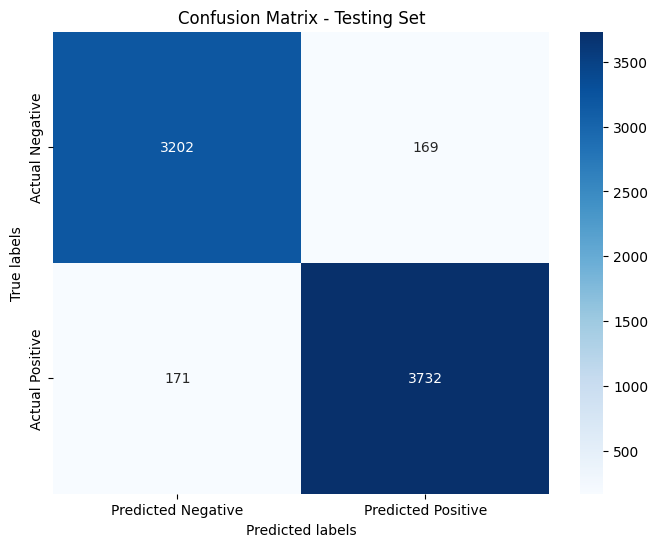

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix for training set
# Get cross-validated predictions
# cv_predictions = cross_val_predict(best_lgb_model, x_train, y_train, cv=5)
conf_matrix_train = confusion_matrix(y_train, cv_predictions_lgb_train)

# Plotting confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Generating confusion matrix for testing set
# cv_predictions = cross_val_predict(lgb_model, x_test, y_test, cv=10)
conf_matrix_test = confusion_matrix(y_test, cv_predictions_lgb_test)

# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()

# Calculating specificity and sensitivity
specificity_lightgbm_train = tn_train / (tn_train + fp_train)
sensitivity_lightgbm_train = tp_train / (tp_train + fn_train)




# Extracting true negatives, false positives, false negatives, and true positives from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculating specificity and sensitivity
specificity_lightgbm_test = tn_test / (tn_test + fp_test)
sensitivity_lightgbm_test = tp_test / (tp_test + fn_test)


print(f"The Sensitivity and Specificity of the Logistic Regression on the training data:\nSpecificity:{specificity_lightgbm_train}\nSensitivity:{sensitivity_lightgbm_train}\n\n")
print(f"The Sensitivity and Specificity of the Logistic Regression on the testing data:\nSpecificity:{specificity_lightgbm_test}\nSensitivity:{sensitivity_lightgbm_test}")



The Sensitivity and Specificity of the Logistic Regression on the training data:
Specificity:0.9435215946843853
Sensitivity:0.9491469816272966


The Sensitivity and Specificity of the Logistic Regression on the testing data:
Specificity:0.9498665084544645
Sensitivity:0.9561875480399693


In [ ]:
import pandas as pd
# Creating DataFrame
LightGBM_output = pd.DataFrame({
    'Training': [train_cv_acc_lgb, train_cv_recall_lgb, train_cv_precision_lgb, train_cv_f1_lgb,roc_auc_train_lightgbm,
                 specificity_lightgbm_train,sensitivity_lightgbm_train],
    'Testing': [test_cv_acc_lgb, test_cv_recall_lgb, test_cv_precision_lgb, test_cv_f1_lgb,roc_auc_test_lightgbm,
                specificity_lightgbm_test, sensitivity_lightgbm_test]},
    # 'Model': ['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']},
                              index = ['Accuracy','Recall','Precision','F1','ROC_AUC','Specificity','Sensitivity'])
print("The metrics for the LightGBM  are: ")
LightGBM_output

The metrics for the LightGBM  are: 


,Training,Testing
Accuracy,0.946553,0.953258
Recall,0.949147,0.956188
Precision,0.951540,0.956678
F1,0.950342,0.956433
ROC_AUC,0.981536,0.981536
Specificity,0.943522,0.949867
Sensitivity,0.949147,0.956188


# **Pickle Files**

# **Using Pickle files to store the output of the trained and tested models for LightGBM**

In [ ]:
import pickle

# Assuming you have already obtained the following variables:
# best_params, train_cv_acc_lgb, train_cv_recall_lgb, train_cv_precision_lgb, train_cv_f1_lgb
# test_cv_acc_lgb, test_cv_recall_lgb, test_cv_precision_lgb, test_cv_f1_lgb

# Create a dictionary to store the results
lgb_results = {
    'best_params': best_params_lightgbm,
    'train_cv_acc': train_cv_acc_lgb,
    'train_cv_recall': train_cv_recall_lgb,
    'train_cv_precision': train_cv_precision_lgb,
    'train_cv_f1': train_cv_f1_lgb,
    'train_cv_roc_auc':roc_auc_train_lightgbm,
    'train_cv_specificity':specificity_lightgbm_train,
    'train_cv_sensitivity':sensitivity_lightgbm_train,
    'test_cv_acc': test_cv_acc_lgb,
    'test_cv_recall': test_cv_recall_lgb,
    'test_cv_precision': test_cv_precision_lgb,
    'test_cv_f1': test_cv_f1_lgb,
    'test_cv_roc_auc':roc_auc_test_lightgbm,
    'test_cv_specificity':specificity_lightgbm_test,
    'test_cv_sensitivity':sensitivity_lightgbm_test
}

# Save the results to a pickle file
with open('lgb_results_phase1.pkl', 'wb') as f:
    pickle.dump(lgb_results, f)

print("LightGBM results saved to 'lgb_results_SA.pkl'.")

# Later, when you want to load the results
# Load the results from the pickle file
with open('lgb_results_phase2.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
best_params = loaded_results['best_params']
train_cv_acc_lgb = loaded_results['train_cv_acc']
train_cv_recall_lgb = loaded_results['train_cv_recall']
train_cv_precision_lgb = loaded_results['train_cv_precision']
train_cv_f1_lgb = loaded_results['train_cv_f1']
train_cv_roc_auc_lgb=loaded_results['train_cv_roc_auc']
train_cv_specificity=loaded_results['train_cv_specificity']
train_cv_sensitivity=loaded_results['train_cv_sensitivity']

test_cv_acc_lgb = loaded_results['test_cv_acc']
test_cv_recall_lgb = loaded_results['test_cv_recall']
test_cv_precision_lgb = loaded_results['test_cv_precision']
test_cv_f1_lgb = loaded_results['test_cv_f1']
test_cv_roc_auc_lgb=loaded_results['test_cv_roc_auc']
test_cv_specificity=loaded_results['test_cv_specificity']
test_cv_sensitivity=loaded_results['test_cv_sensitivity']


# Now you can directly access and use the loaded results without re-running the code


LightGBM results saved to 'lgb_results_SA.pkl'.


# **Reading Results of LightGBM from the PickleFile.**

In [ ]:
import pickle

# Load the results from the pickle file
with open('lgb_results_phase1.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
# best_params = loaded_results['best_params']
# train_cv_acc_lgb = loaded_results['train_cv_acc']
# train_cv_recall_lgb = loaded_results['train_cv_recall']
# train_cv_precision_lgb = loaded_results['train_cv_precision']
# train_cv_f1_lgb = loaded_results['train_cv_f1']
# test_cv_acc_lgb = loaded_results['test_cv_acc']
# test_cv_recall_lgb = loaded_results['test_cv_recall']
# test_cv_precision_lgb = loaded_results['test_cv_precision']
# test_cv_f1_lgb = loaded_results['test_cv_f1']

best_params = loaded_results['best_params']
train_cv_acc_lgb = loaded_results['train_cv_acc']
train_cv_recall_lgb = loaded_results['train_cv_recall']
train_cv_precision_lgb = loaded_results['train_cv_precision']
train_cv_f1_lgb = loaded_results['train_cv_f1']
train_cv_roc_auc_lgb=loaded_results['train_cv_roc_auc']
train_cv_specificity=loaded_results['train_cv_specificity']
train_cv_sensitivity=loaded_results['train_cv_sensitivity']

test_cv_acc_lgb = loaded_results['test_cv_acc']
test_cv_recall_lgb = loaded_results['test_cv_recall']
test_cv_precision_lgb = loaded_results['test_cv_precision']
test_cv_f1_lgb = loaded_results['test_cv_f1']
test_cv_roc_auc_lgb=loaded_results['test_cv_roc_auc']
test_cv_specificity=loaded_results['test_cv_specificity']
test_cv_sensitivity=loaded_results['test_cv_sensitivity']

# Now you can use the loaded results as needed
print("Best parameters:", best_params)
print("Training Set Metrics:")
print("Accuracy:", train_cv_acc_lgb)
print("Recall:", train_cv_recall_lgb)
print("Precision:", train_cv_precision_lgb)
print("F1 Score:", train_cv_f1_lgb)
print("ROC AUC:", train_cv_roc_auc_lgb)
print("Specificity:", train_cv_specificity)
print("Sensitivity:", train_cv_sensitivity)



print("\n\nTesting Set Metrics:")
print("Accuracy:", test_cv_acc_lgb)
print("Recall:", test_cv_recall_lgb)
print("Precision:", test_cv_precision_lgb)
print("F1 Score:", test_cv_f1_lgb)
print("ROC AUC:", test_cv_roc_auc_lgb)
print("Specificity:", test_cv_specificity)
print("Sensitivity:", test_cv_sensitivity)

Best parameters: {'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 20, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}
Training Set Metrics:
Accuracy: 0.9420742486741308
Recall: 0.9466316710411199
Precision: 0.9459075510873128
F1 Score: 0.9462694725334792
ROC AUC: 0.9413382109660263
Specificity: 0.9367492972144135
Sensitivity: 0.9466316710411199


Testing Set Metrics:
Accuracy: 0.9408853450646137
Recall: 0.9461952344350499
Precision: 0.9437771530794786
F1 Score: 0.9449846468781985
ROC AUC: 0.9413382109660263
Specificity: 0.9347374666271137
Sensitivity: 0.9461952344350499


# **Picklefiles for SVM**

# **Saving the results of SVM into pickle files.**

In [ ]:
import pickle

# Assuming you have already obtained the following variables:
# best_params, train_cv_acc_lgb, train_cv_recall_lgb, train_cv_precision_lgb, train_cv_f1_lgb
# test_cv_acc_lgb, test_cv_recall_lgb, test_cv_precision_lgb, test_cv_f1_lgb

# Create a dictionary to store the results
svm_results = {
    'best_params_svm': best_params,
    'train_cv_acc_svm': train_cv_acc_svm_linear,
    'train_cv_recall_svm': train_cv_recall_svm_linear,
    'train_cv_precision_svm': train_cv_precision_svm_linear,
    'train_cv_f1_svm': train_cv_f1_svm_linear,
    'train_cv_roc_auc_svm':roc_auc_train_svm,
    'train_cv_specificity_svm':specificity_svm_train,
    'train_cv_sensitivity_svm':sensitivity_svm_train,
    'test_cv_acc_svm': test_cv_acc_SVM,
    'test_cv_recall_svm': test_cv_recall_SVM,
    'test_cv_precision_svm': test_cv_precision_SVM,
    'test_cv_f1_svm': test_cv_f1_SVM,
    'test_cv_roc_auc_svm':roc_auc_test_svm,
    'test_cv_specificity_svm':specificity_svm_test,
    'test_cv_sensitivity_svm':sensitivity_svm_test
}

# Save the results to a pickle file
with open('svm_results_phase1.pkl', 'wb') as f:
    pickle.dump(svm_results, f)

print("SVM results saved to 'svm_results_phase1.pkl'.")

# Later, when you want to load the results
# Load the results from the pickle file
with open('svm_results_phase1.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
best_params = loaded_results['best_params_svm']
train_cv_acc_svm = loaded_results['train_cv_acc_svm']
train_cv_recall_svm = loaded_results['train_cv_recall_svm']
train_cv_precision_svm = loaded_results['train_cv_precision_svm']
train_cv_f1_svm = loaded_results['train_cv_f1_svm']
train_cv_roc_auc_svm=loaded_results['train_cv_roc_auc_svm']
train_cv_specificity_svm=loaded_results['train_cv_specificity_svm']
train_cv_sensitivity_svm=loaded_results['train_cv_sensitivity_svm']

test_cv_acc_svm = loaded_results['test_cv_acc_svm']
test_cv_recall_svm = loaded_results['test_cv_recall_svm']
test_cv_precision_svm = loaded_results['test_cv_precision_svm']
test_cv_f1_svm = loaded_results['test_cv_f1_svm']
test_cv_roc_auc_svm=loaded_results['test_cv_roc_auc_svm']
test_cv_specificity_svm=loaded_results['test_cv_specificity_svm']
test_cv_sensitivity_svm=loaded_results['test_cv_sensitivity_svm']


# Now you can directly access and use the loaded results without re-running the code


SVM results saved to 'svm_results_phase1.pkl'.


# **Reading the results of SVM from pickle files.**

In [ ]:
import pickle

# Load the results from the pickle file
with open('svm_results_phase1.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
# best_params = loaded_results['best_params']
# train_cv_acc_lgb = loaded_results['train_cv_acc']
# train_cv_recall_lgb = loaded_results['train_cv_recall']
# train_cv_precision_lgb = loaded_results['train_cv_precision']
# train_cv_f1_lgb = loaded_results['train_cv_f1']
# test_cv_acc_lgb = loaded_results['test_cv_acc']
# test_cv_recall_lgb = loaded_results['test_cv_recall']
# test_cv_precision_lgb = loaded_results['test_cv_precision']
# test_cv_f1_lgb = loaded_results['test_cv_f1']

best_params_svm = loaded_results['best_params_svm']
train_cv_acc_svm = loaded_results['train_cv_acc_svm']
train_cv_recall_svm = loaded_results['train_cv_recall_svm']
train_cv_precision_svm = loaded_results['train_cv_precision_svm']
train_cv_f1_svm = loaded_results['train_cv_f1_svm']
train_cv_roc_auc_svm=loaded_results['train_cv_roc_auc_svm']
train_cv_specificity_svm=loaded_results['train_cv_specificity_svm']
train_cv_sensitivity_svm=loaded_results['train_cv_sensitivity_svm']

test_cv_acc_svm = loaded_results['test_cv_acc_svm']
test_cv_recall_lgb_svm = loaded_results['test_cv_recall_svm']
test_cv_precision_svm = loaded_results['test_cv_precision_svm']
test_cv_f1_svm = loaded_results['test_cv_f1_svm']
test_cv_roc_auc_svm=loaded_results['test_cv_roc_auc_svm']
test_cv_specificity_svm=loaded_results['test_cv_specificity_svm']
test_cv_sensitivity_svm=loaded_results['test_cv_sensitivity_svm']

# Now you can use the loaded results as needed
print("Best parameters:", best_params_svm)
print("Training Set Metrics:")
print("Accuracy:", train_cv_acc_svm)
print("Recall:", train_cv_recall_svm)
print("Precision:", train_cv_precision_svm)
print("F1 Score:", train_cv_f1_svm)
print("ROC AUC:", train_cv_roc_auc_svm)
print("Specificity:", train_cv_specificity_svm)
print("Sensitivity:", train_cv_sensitivity_svm)



print("\n\nTesting Set Metrics:")
print("Accuracy:", test_cv_acc_svm)
print("Recall:", test_cv_recall_svm)
print("Precision:", test_cv_precision_svm)
print("F1 Score:", test_cv_f1_svm)
print("ROC AUC:", test_cv_roc_auc_svm)
print("Specificity:", test_cv_specificity_svm)
print("Sensitivity:", test_cv_sensitivity_svm)


Best parameters: {'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 20, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}
Training Set Metrics:
Accuracy: 0.9121979964643488
Recall: 0.9195100612423447
Precision: 0.917703558175071
F1 Score: 0.918605921555774
ROC AUC: 0.8430026579861775
Specificity: 0.9036544850498339
Sensitivity: 0.9195100612423447


Testing Set Metrics:
Accuracy: 0.8902941985152598
Recall: 0.8993082244427364
Precision: 0.896551724137931
F1 Score: 0.8979278587874137
ROC AUC: 0.8895829167304159
Specificity: 0.8798576090180955
Sensitivity: 0.8993082244427364


# **Pickle Files for Logistic Regression.**

# **Saving the results of logistic regression into pickle files.**

In [ ]:
# Save the logistic regression results to a pickle file
logistic_results = {
    'best_params_logistic': best_params_logistic,
    'train_cv_acc_logistic': train_cv_acc_logistic,
    'train_cv_recall_logistic': train_cv_recall_logistic,
    'train_cv_precision_logistic': train_cv_precision_logistic,
    'train_cv_f1_logistic': train_cv_f1_logistic,
    'train_cv_roc_auc_logistic': roc_auc,
    'train_cv_specificity_logistic': specificity_logistic_train,
    'train_cv_sensitivity_logistic': sensitivity_logistic_train,

    'test_cv_acc_logistic': test_cv_acc_logistic,
    'test_cv_recall_logistic': test_cv_recall_logistic,
    'test_cv_precision_logistic': test_cv_precision_logistic,
    'test_cv_f1_logistic': test_cv_f1_logistic,
    'test_cv_roc_auc_logistic': roc_auc_logistic_test,
    'test_cv_specificity_logistic': specificity_svm_test,
    'test_cv_sensitivity_logistic': sensitivity_svm_test
}

# Save the results to a pickle file
with open('logistic_results_phase1.pkl', 'wb') as f:
    pickle.dump(logistic_results, f)

print("Logistic results saved to 'logistic_results_phase1.pkl'.")



Logistic results saved to 'logistic_results_phase1.pkl'.


# **Reading the results of logistic regression model from pickle files.**

In [ ]:
import pickle

# Load the results from the pickle file
with open('logistic_results_phase1.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
best_params_logistic = loaded_results['best_params_logistic']
train_cv_acc_logistic = loaded_results['train_cv_acc_logistic']
train_cv_recall_logistic = loaded_results['train_cv_recall_logistic']
train_cv_precision_logistic = loaded_results['train_cv_precision_logistic']
train_cv_f1_logistic = loaded_results['train_cv_f1_logistic']
train_cv_roc_auc_logistic = loaded_results['train_cv_roc_auc_logistic']
train_cv_specificity_logistic = loaded_results['train_cv_specificity_logistic']
train_cv_sensitivity_logistic = loaded_results['train_cv_sensitivity_logistic']

test_cv_acc_logistic = loaded_results['test_cv_acc_logistic']
test_cv_recall_logistic = loaded_results['test_cv_recall_logistic']
test_cv_precision_logistic = loaded_results['test_cv_precision_logistic']
test_cv_f1_logistic = loaded_results['test_cv_f1_logistic']
test_cv_roc_auc_logistic = loaded_results['test_cv_roc_auc_logistic']
test_cv_specificity_logistic = loaded_results['test_cv_specificity_logistic']
test_cv_sensitivity_logistic = loaded_results['test_cv_sensitivity_logistic']

# Now you can use the loaded results as needed
print("Best parameters:", best_params_logistic)
print("Training Set Metrics:")
print("Accuracy:", train_cv_acc_logistic)
print("Recall:", train_cv_recall_logistic)
print("Precision:", train_cv_precision_logistic)
print("F1 Score:", train_cv_f1_logistic)
print("ROC AUC:", train_cv_roc_auc_logistic)
print("Specificity:", train_cv_specificity_logistic)
print("Sensitivity:", train_cv_sensitivity_logistic)

print("\n\nTesting Set Metrics:")
print("Accuracy:", test_cv_acc_logistic)
print("Recall:", test_cv_recall_logistic)
print("Precision:", test_cv_precision_logistic)
print("F1 Score:", test_cv_f1_logistic)
print("ROC AUC:", test_cv_roc_auc_logistic)
print("Specificity:", test_cv_specificity_logistic)
print("Sensitivity:", test_cv_sensitivity_logistic)


Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Training Set Metrics:
Accuracy: 0.845020624631703
Recall: 0.8689851268591426
Precision: 0.8473021966304116
F1 Score: 0.8580066947413887
ROC AUC: 0.9789623602256834
Specificity: 0.8170201891132124
Sensitivity: 0.8689851268591426


Testing Set Metrics:
Accuracy: 0.8395655760241958
Recall: 0.8585703305149884
Precision: 0.8449319213313162
F1 Score: 0.8516965306900496
ROC AUC: 0.838065942474937
Specificity: 0.8798576090180955
Sensitivity: 0.8993082244427364


# **Pickle Files for random forest.**

# **Saving the results of RF model into pickle files.**

In [ ]:
# Save the random forest results to a pickle file
rf_results = {
    'best_params_rf': best_params_rf,
    'train_cv_acc_rf': train_cv_acc_rf,
    'train_cv_recall_rf': train_cv_recall_rf,
    'train_cv_precision_rf': train_cv_precision_rf,
    'train_cv_f1_rf': train_cv_f1_rf,
    'train_cv_roc_auc_rf': roc_auc_train_rf,
    'train_cv_specificity_rf': specificity_rf_train,
    'train_cv_sensitivity_rf': sensitivity_rf_train,

    'test_cv_acc_rf': test_cv_acc_rf,
    'test_cv_recall_rf': test_cv_recall_rf,
    'test_cv_precision_rf': test_cv_precision_rf,
    'test_cv_f1_rf': test_cv_f1_rf,
    'test_cv_roc_auc_rf': roc_auc_test_rf,
    'test_cv_specificity_rf': specificity_rf_test,
    'test_cv_sensitivity_rf': sensitivity_rf_test
}

# Save the results to a pickle file
with open('rf_results_phase1.pkl', 'wb') as f:
    pickle.dump(rf_results, f)

print("Random Forest results saved to 'rf_results_phase1.pkl'.")


Random Forest results saved to 'rf_results_phase1.pkl'.


# **Reading the metrics of RF model from Pickle Files.**

In [ ]:
import pickle

# Load the results from the pickle file
with open('rf_results_phase1.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Access the loaded results
best_params_rf = loaded_results['best_params_rf']
train_cv_acc_rf = loaded_results['train_cv_acc_rf']
train_cv_recall_rf = loaded_results['train_cv_recall_rf']
train_cv_precision_rf = loaded_results['train_cv_precision_rf']
train_cv_f1_rf = loaded_results['train_cv_f1_rf']
train_cv_roc_auc_rf = loaded_results['train_cv_roc_auc_rf']
train_cv_specificity_rf = loaded_results['train_cv_specificity_rf']
train_cv_sensitivity_rf = loaded_results['train_cv_sensitivity_rf']

test_cv_acc_rf = loaded_results['test_cv_acc_rf']
test_cv_recall_rf = loaded_results['test_cv_recall_rf']
test_cv_precision_rf = loaded_results['test_cv_precision_rf']
test_cv_f1_rf = loaded_results['test_cv_f1_rf']
test_cv_roc_auc_rf = loaded_results['test_cv_roc_auc_rf']
test_cv_specificity_rf = loaded_results['test_cv_specificity_rf']
test_cv_sensitivity_rf = loaded_results['test_cv_sensitivity_rf']

# Now you can use the loaded results as needed
print("Best parameters:", best_params_rf)
print("Training Set Metrics:")
print("Accuracy:", train_cv_acc_rf)
print("Recall:", train_cv_recall_rf)
print("Precision:", train_cv_precision_rf)
print("F1 Score:", train_cv_f1_rf)
print("ROC AUC:", train_cv_roc_auc_rf)
print("Specificity:", train_cv_specificity_rf)
print("Sensitivity:", train_cv_sensitivity_rf)

print("\n\nTesting Set Metrics:")
print("Accuracy:", test_cv_acc_rf)
print("Recall:", test_cv_recall_rf)
print("Precision:", test_cv_precision_rf)
print("F1 Score:", test_cv_f1_rf)
print("ROC AUC:", test_cv_roc_auc_rf)
print("Specificity:", test_cv_specificity_rf)
print("Sensitivity:", test_cv_sensitivity_rf)


Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Training Set Metrics:
Accuracy: 0.9413671184443135
Recall: 0.9417104111986002
Precision: 0.9490796869833572
F1 Score: 0.9453806883680079
ROC AUC: 0.9413382109660263
Specificity: 0.9409660107334525
Sensitivity: 0.9417104111986002


Testing Set Metrics:
Accuracy: 0.9371734946384382
Recall: 0.9333845759672047
Precision: 0.9486979166666667
F1 Score: 0.9409789487278832
ROC AUC: 0.9374724719052874
Specificity: 0.9415603678433699
Sensitivity: 0.9333845759672047


In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# Organize results into a list of lists
results = [
    ["LightGBM", execution_time_lightgbm, memory_used_lightgbm],
    ["Logistic Regression", execution_time_logistic, memory_used_logistic],
    ["Support Vector Machine", execution_time_svm, memory_used_svm],
    ["Random Forest", execution_time_rf, memory_used_rf]
]

# Print results in a table
print(tabulate(results, headers=["Model", "Execution Time (seconds)", "Memory Used (MiB)"], tablefmt="grid"))


+------------------------+----------------------------+---------------------+
| Model                  |   Execution Time (seconds) |   Memory Used (MiB) |
+========================+============================+=====================+
| LightGBM               |                    139.518 |             563.016 |
+------------------------+----------------------------+---------------------+
| Logistic Regression    |                    203.937 |             328.906 |
+------------------------+----------------------------+---------------------+
| Support Vector Machine |                   4434.31  |             537.227 |
+------------------------+----------------------------+---------------------+
| Random Forest          |                    965.474 |             542.145 |
+------------------------+----------------------------+---------------------+


# **Brief Conclusion:**

**The AUC is one of the important metrics to understand whether model is differentiating well in between both the binary classes. All the models are performing well with respect to this. Also, it can be concluded that the newly added model is performing much less than all the other previous models. Consequently, in terms of better customer churn prediction, naive bayes is not as good as the other models.**